In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import prince
from scipy.stats import f_oneway, ttest_ind, chi2_contingency, chisquare

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("D:\Book\H2_PredictingOccupancy_100daysPrior.csv")

In [3]:
dataset[dataset.columns[0:7]].head()

AdjustedLeadTime AdjustedArrivalDate  NumberOfRooms  \
0               100          2015-07-01            0.0   
1                99          2015-07-01            0.0   
2                98          2015-07-01            0.0   
3                97          2015-07-01            0.0   
4                96          2015-07-01            0.0   

   CumulativeNumberOfRooms  NumberOfRooms_Substract  \
0                     74.0                      0.0   
1                     74.0                      0.0   
2                     74.0                      0.0   
3                     74.0                      0.0   
4                     74.0                      0.0   

   CumulativeNumberOfRooms_Substract  CumulativeNumberOfRoomsNet  
0                                0.0                        74.0  
1                                0.0                        74.0  
2                                0.0                        74.0  
3                                0.0                        74.0  
4                                0.0                        74.0

In [4]:
dataset[dataset.columns[7:]].head()

TotalRooms  Revenue  CumulativeRevenue  Revenue_Substract  \
0        65.0      0.0             7180.0                0.0   
1        65.0      0.0             7180.0                0.0   
2        65.0      0.0             7180.0                0.0   
3        65.0      0.0             7180.0                0.0   
4        65.0      0.0             7180.0                0.0   

   CumulativeRevenue_Substract  CumulativeRevenueNet  DayOfWeek  Weekend  \
0                          0.0                7180.0          3        0   
1                          0.0                7180.0          3        0   
2                          0.0                7180.0          3        0   
3                          0.0                7180.0          3        0   
4                          0.0                7180.0          3        0   

   WeekOfYear  DayOfMonth  WeekOfMonth  MonthOfYear  
0          27           1            1            7  
1          27           1            1            7  
2          27           1            1            7  
3          27           1            1            7  
4          27           1            1            7

## Numerical Features

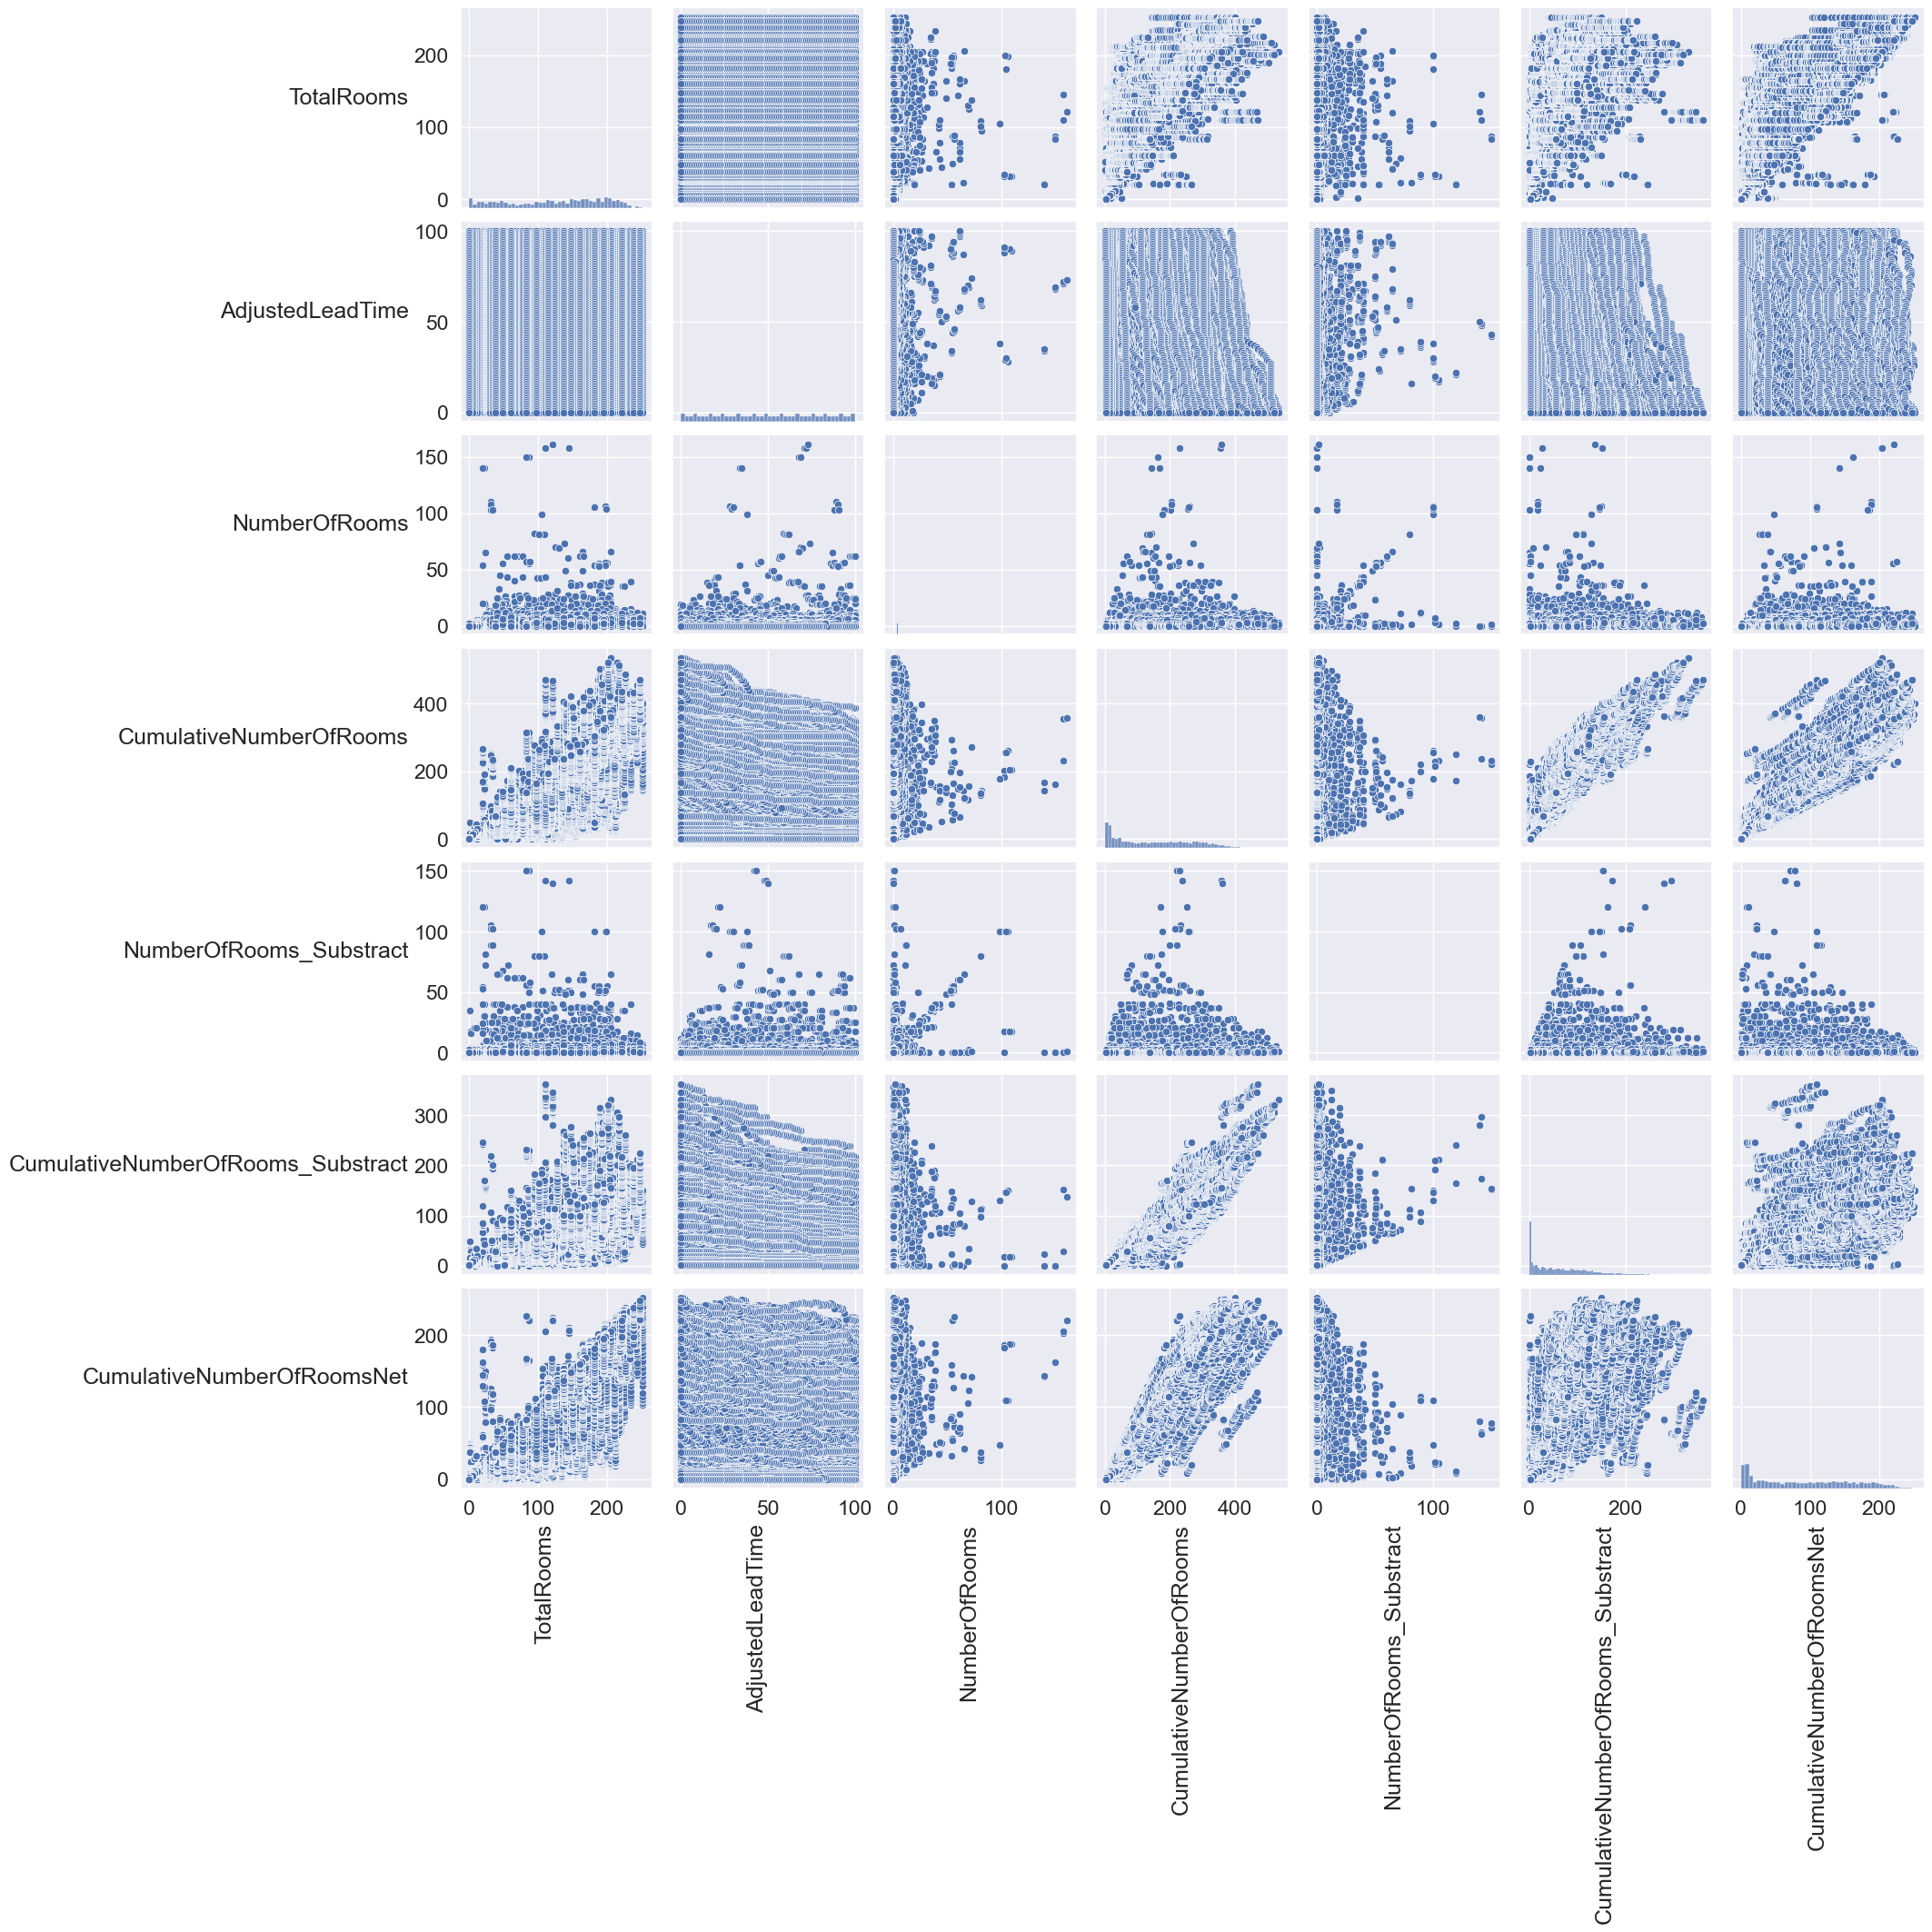

In [5]:
#pairplot with rooms features
pairplot_columns=['AdjustedLeadTime', 'NumberOfRooms','CumulativeNumberOfRooms', 'NumberOfRooms_Substract','CumulativeNumberOfRooms_Substract', 'CumulativeNumberOfRoomsNet','TotalRooms', 'ADR', 'CumulativeADR', 'ADR_Substract','CumulativeADR_Substract', 'CumulativeADRNet', 'TotalADR', 'DayOfWeek','WeekOfYear', 'DayOfMonth', 'WeekOfMonth', 'MonthOfYear']
pairplot_columns1=['TotalRooms', 'AdjustedLeadTime', 'NumberOfRooms','CumulativeNumberOfRooms', 'NumberOfRooms_Substract','CumulativeNumberOfRooms_Substract', 'CumulativeNumberOfRoomsNet']

sns.set(font_scale=1.5)
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
grid = sns.pairplot(dataset[pairplot_columns1])
for axes in grid.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=90, horizontalalignment='right')
#     axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

#plt.title('Pairplot of Total rooms reservation with other features derived from bookings')
plt.show()


<AxesSubplot: >

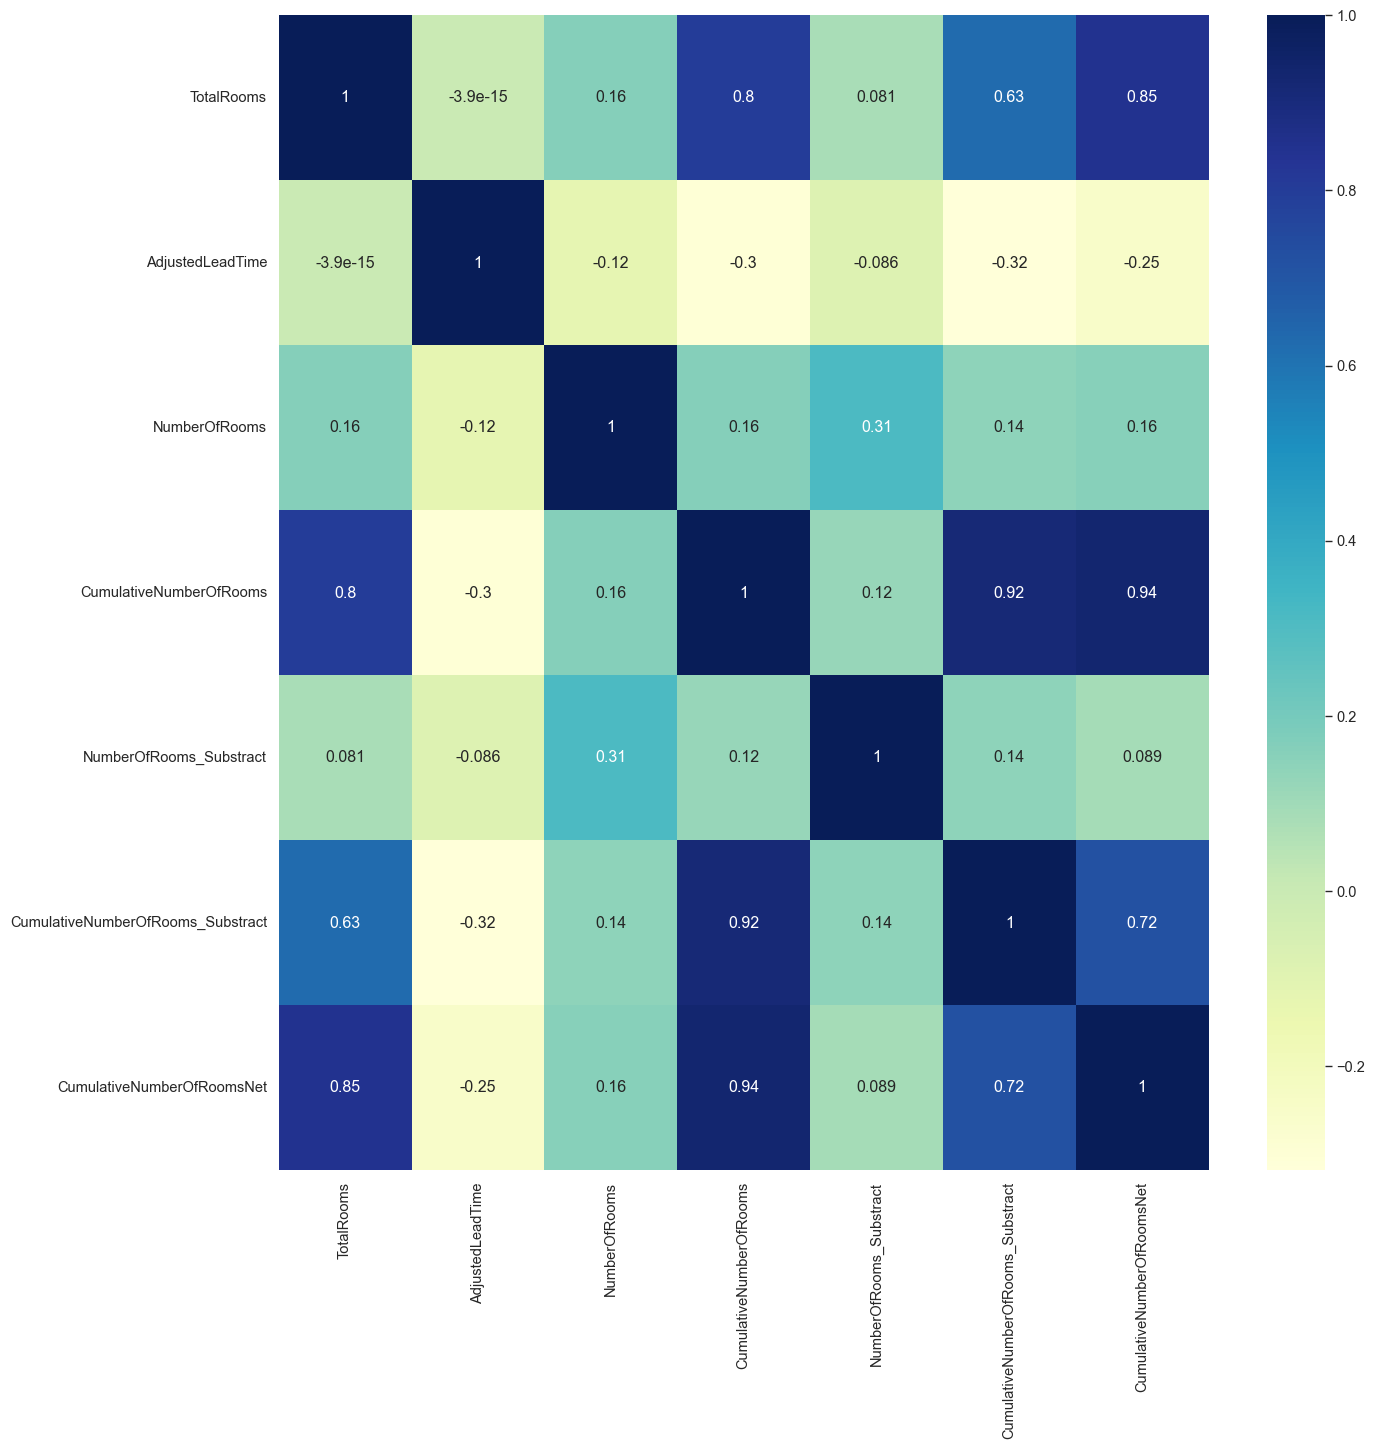

In [6]:
#correlation_columns=['TotalRooms','AdjustedLeadTime', 'NumberOfRooms','CumulativeNumberOfRooms', 'NumberOfRooms_Substract','CumulativeNumberOfRooms_Substract', 'CumulativeNumberOfRoomsNet', 'ADR', 'CumulativeADR', 'ADR_Substract','CumulativeADR_Substract', 'CumulativeADRNet', 'TotalADR']
sns.set(rc={'figure.figsize':(15,15)})
sns.set_context('paper', font_scale = 1.2)
sns.heatmap(dataset[pairplot_columns1].corr(), cmap="YlGnBu", annot=True)

In [7]:
dataset['AdjustedLeadTime_CumulativeNumberOfRooms'] = dataset['AdjustedLeadTime']*dataset['CumulativeNumberOfRooms']
dataset['AdjustedLeadTime_CumulativeNumberOfRooms_Substract'] = dataset['AdjustedLeadTime']*dataset['CumulativeNumberOfRooms_Substract']
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'] = dataset['AdjustedLeadTime']*dataset['CumulativeNumberOfRoomsNet']
pairplot_columns1_1=['TotalRooms','AdjustedLeadTime_CumulativeNumberOfRooms','AdjustedLeadTime_CumulativeNumberOfRooms_Substract','AdjustedLeadTime_CumulativeNumberOfRoomsNet']

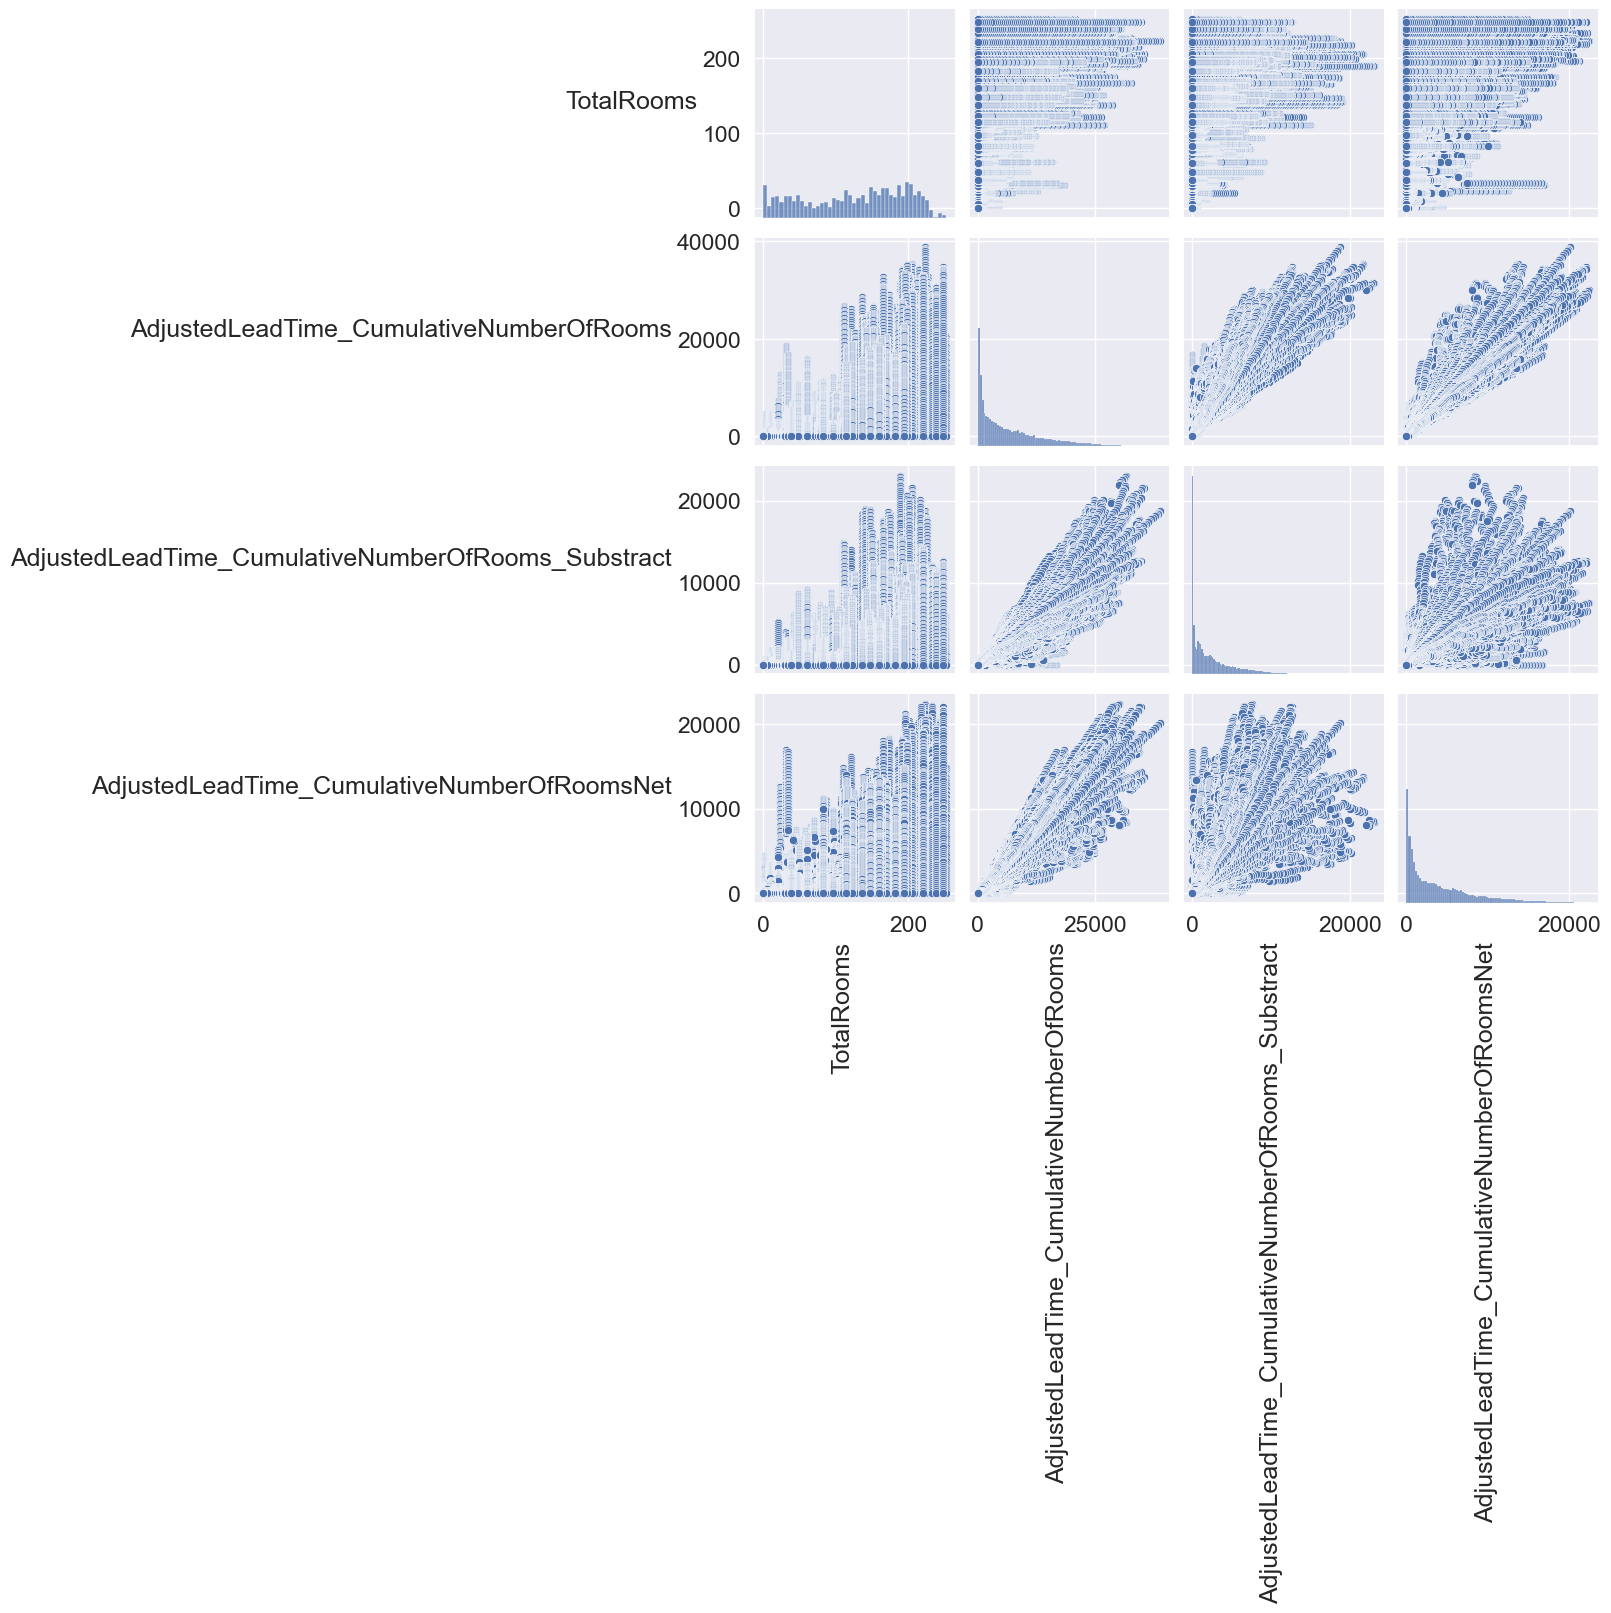

In [8]:
### Pairplot with interaction effect features
sns.set(font_scale=1.5)
grid = sns.pairplot(dataset[pairplot_columns1_1])
for axes in grid.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=90, horizontalalignment='right')

plt.show()


<AxesSubplot: >

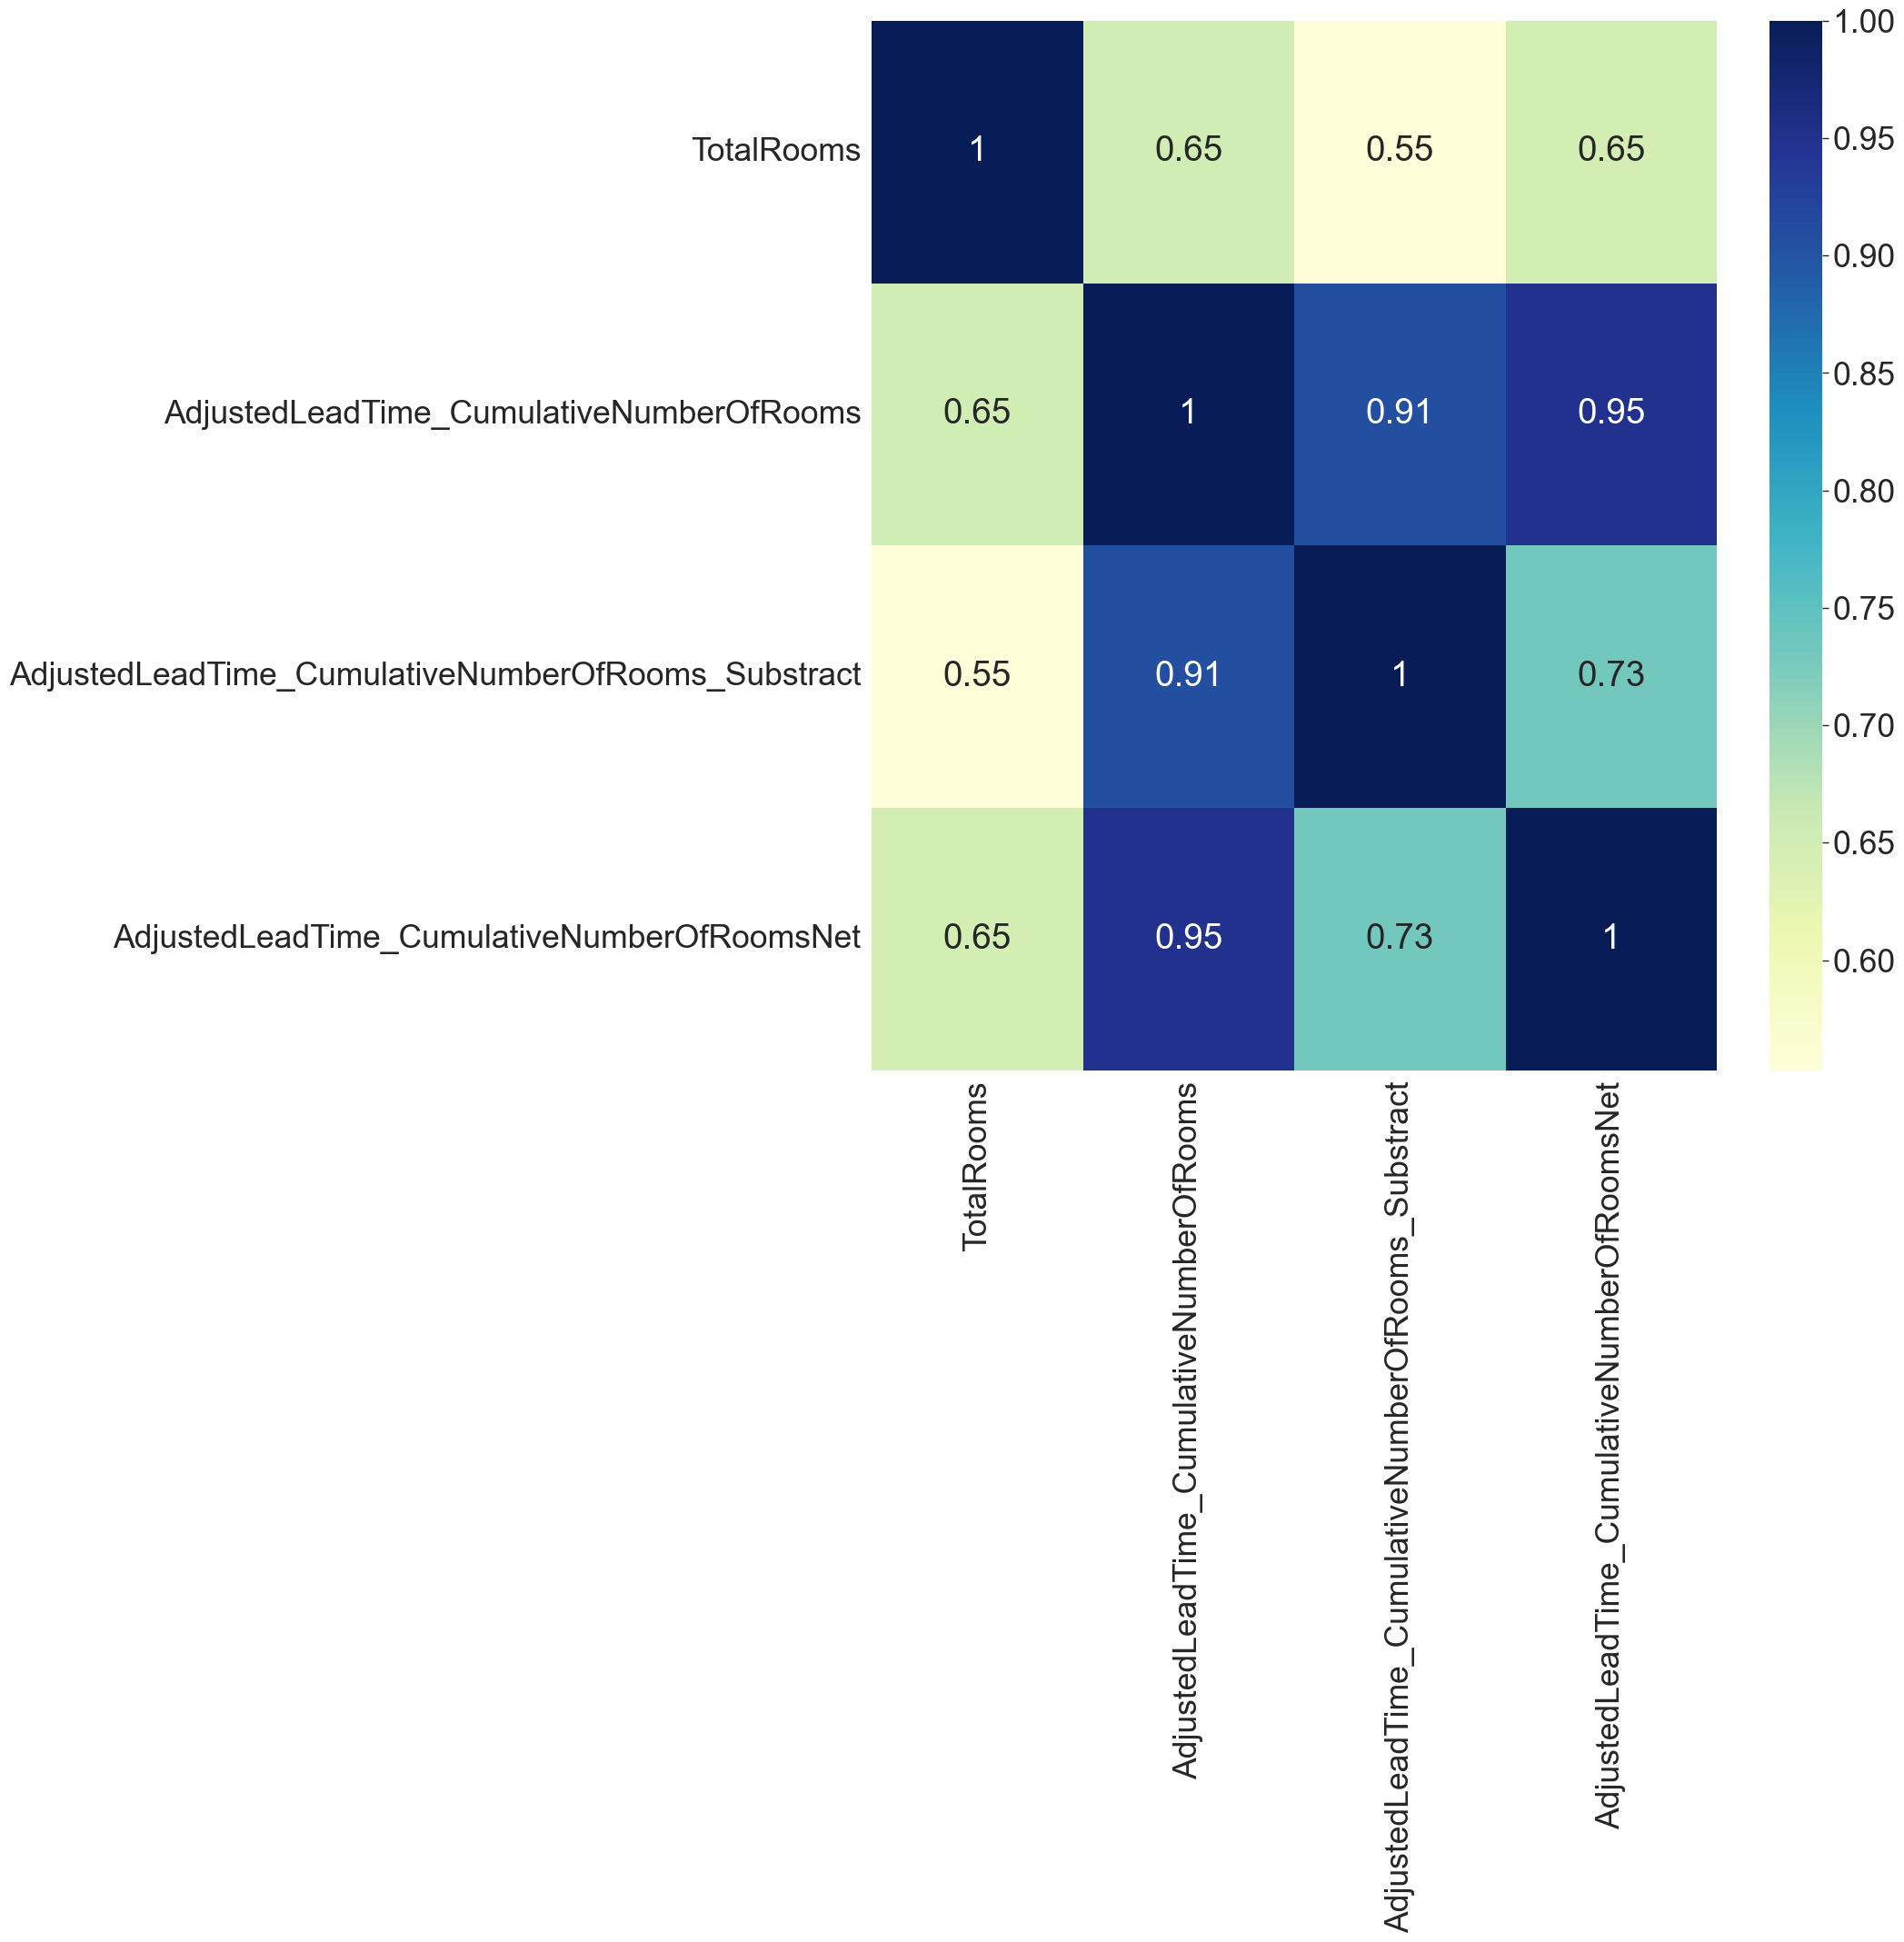

In [9]:
#correlation_columns=['TotalRooms','AdjustedLeadTime', 'NumberOfRooms','CumulativeNumberOfRooms', 'NumberOfRooms_Substract','CumulativeNumberOfRooms_Substract', 'CumulativeNumberOfRoomsNet', 'ADR', 'CumulativeADR', 'ADR_Substract','CumulativeADR_Substract', 'CumulativeADRNet', 'TotalADR']
sns.set(rc={'figure.figsize':(15,15)})
sns.set_context('paper', font_scale = 2.9)
sns.heatmap(dataset[pairplot_columns1_1].corr(), cmap="YlGnBu", annot=True)

#### Second set of numerical features

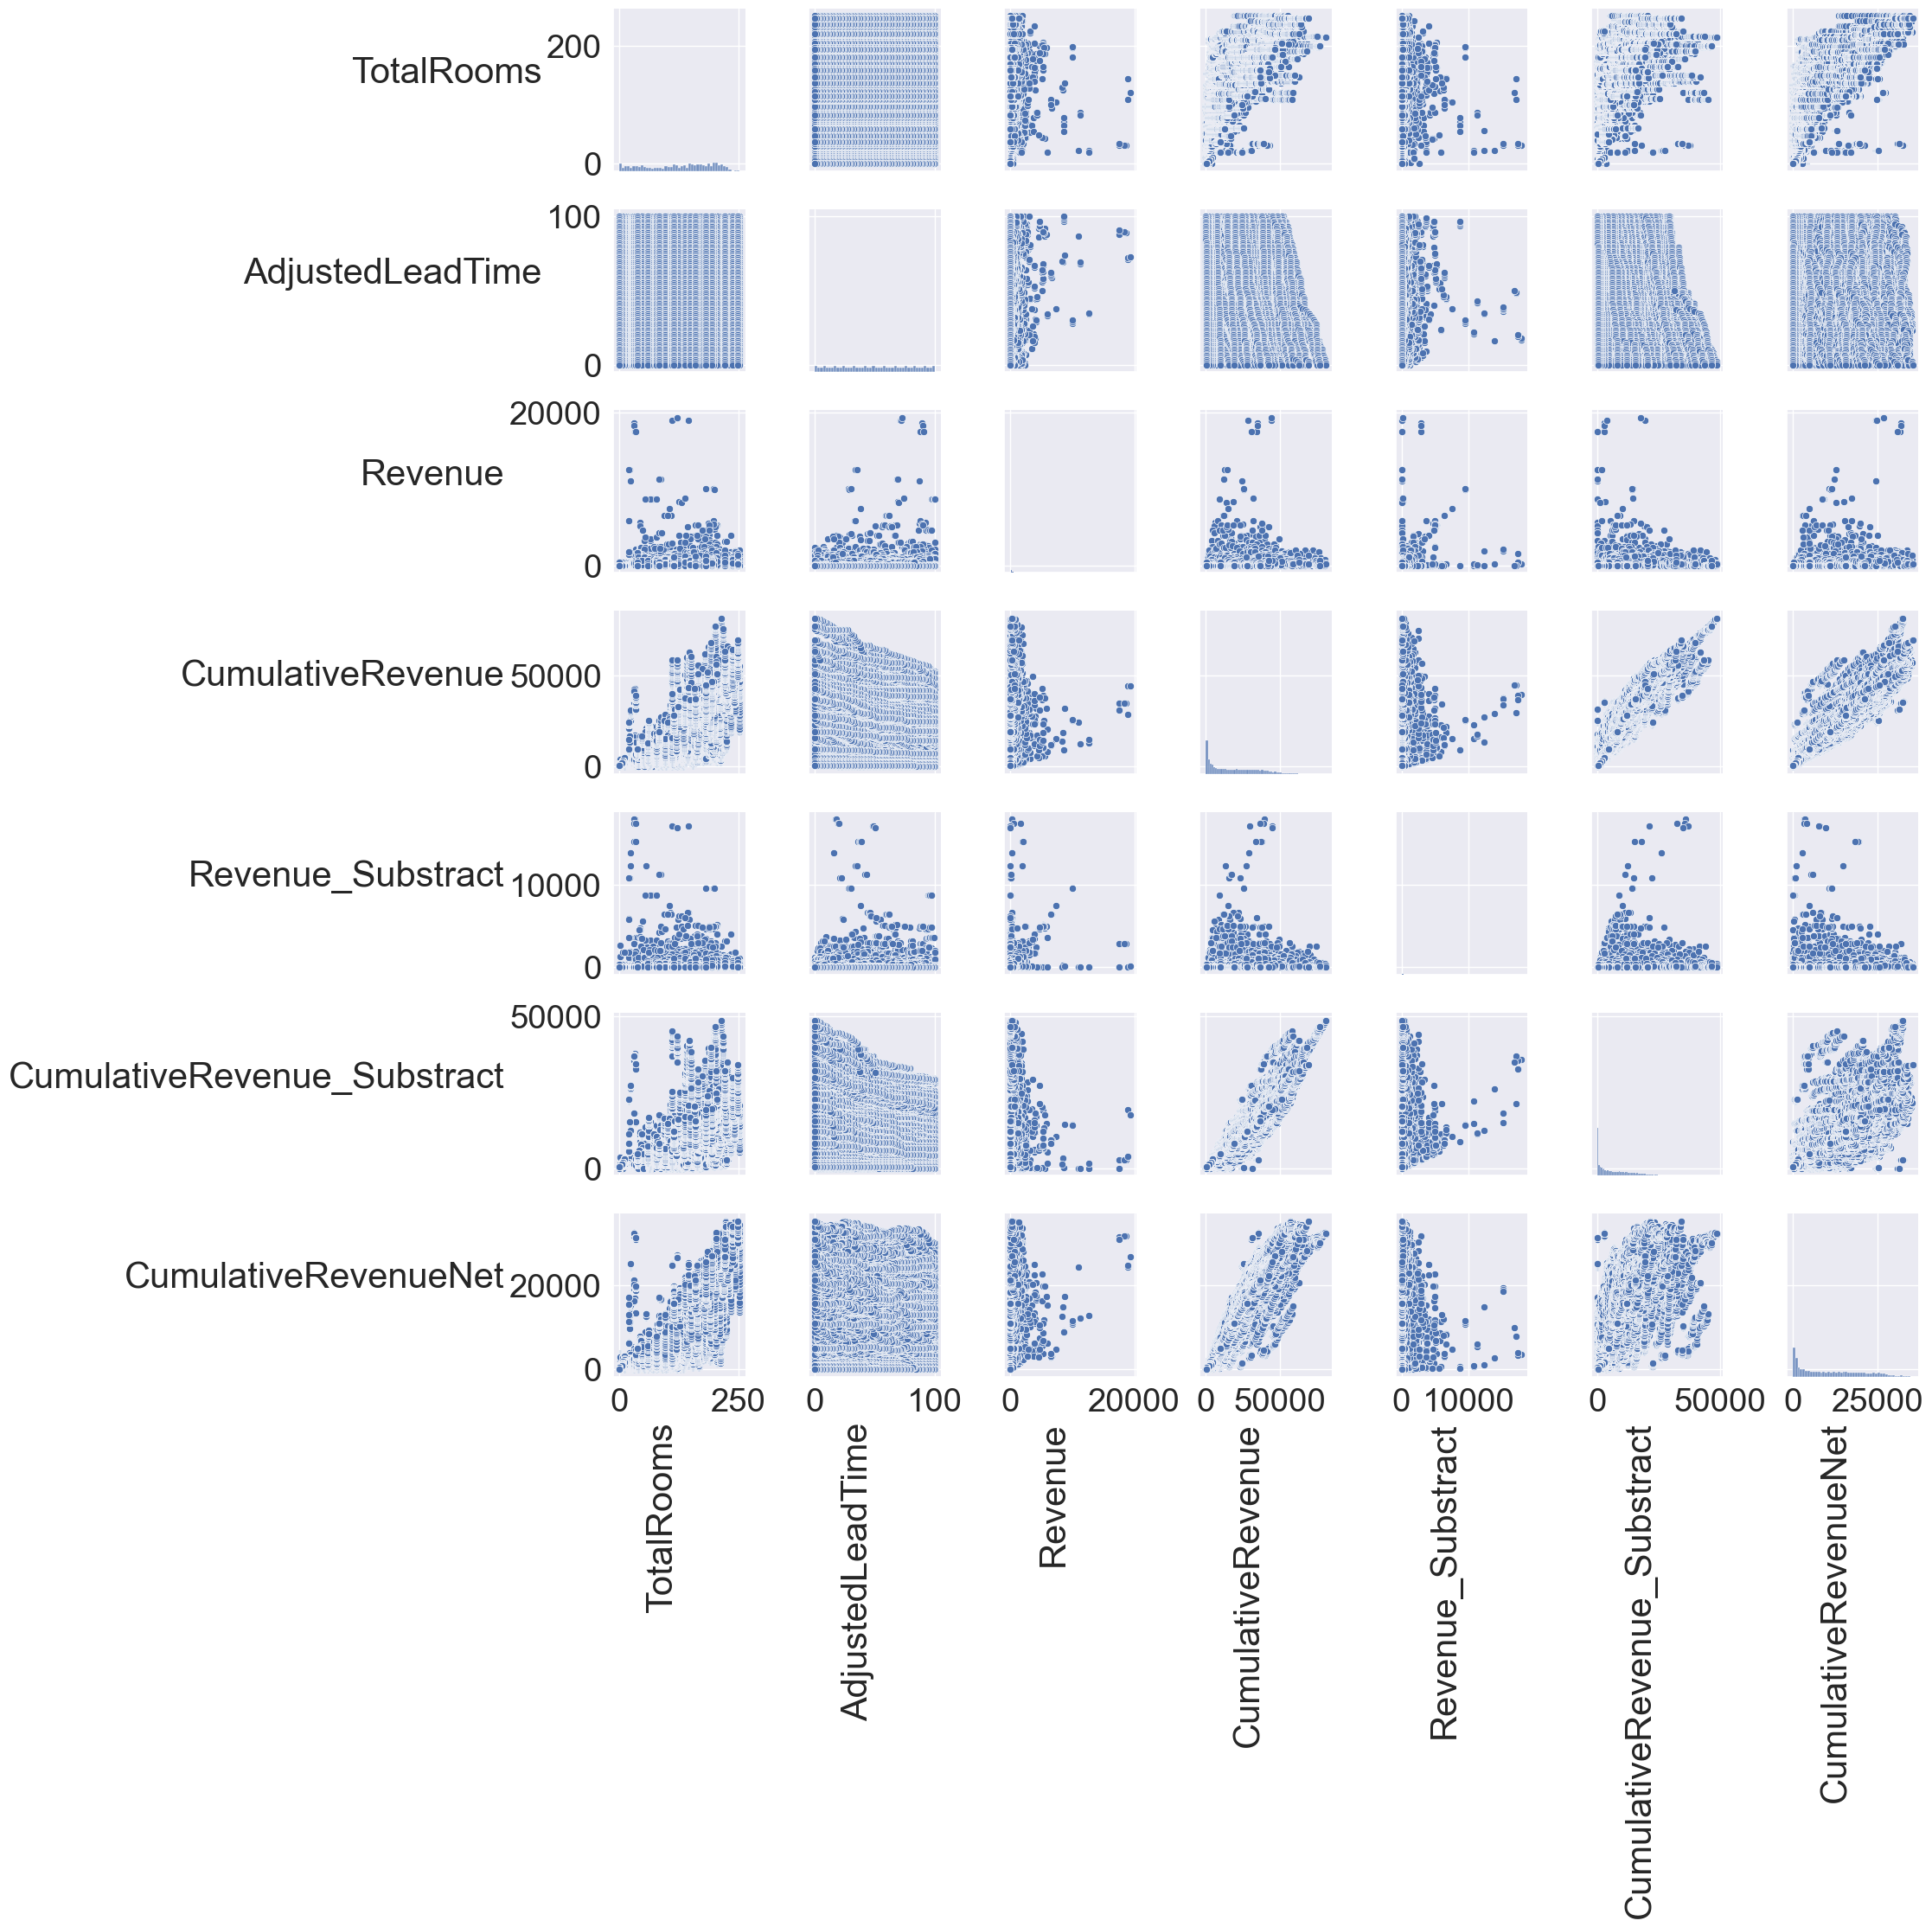

In [10]:
#pairplot with ADR
pairplot_columns2=['TotalRooms', 'AdjustedLeadTime','Revenue', 'CumulativeRevenue', 'Revenue_Substract','CumulativeRevenue_Substract', 'CumulativeRevenueNet']

sns.set(font_scale=2.5)
grid = sns.pairplot(dataset[pairplot_columns2])
for axes in grid.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=90, horizontalalignment='right')
#     axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

#plt.title('Pairplot of Total rooms reservation with other features derived from bookings')
plt.show()


<AxesSubplot: >

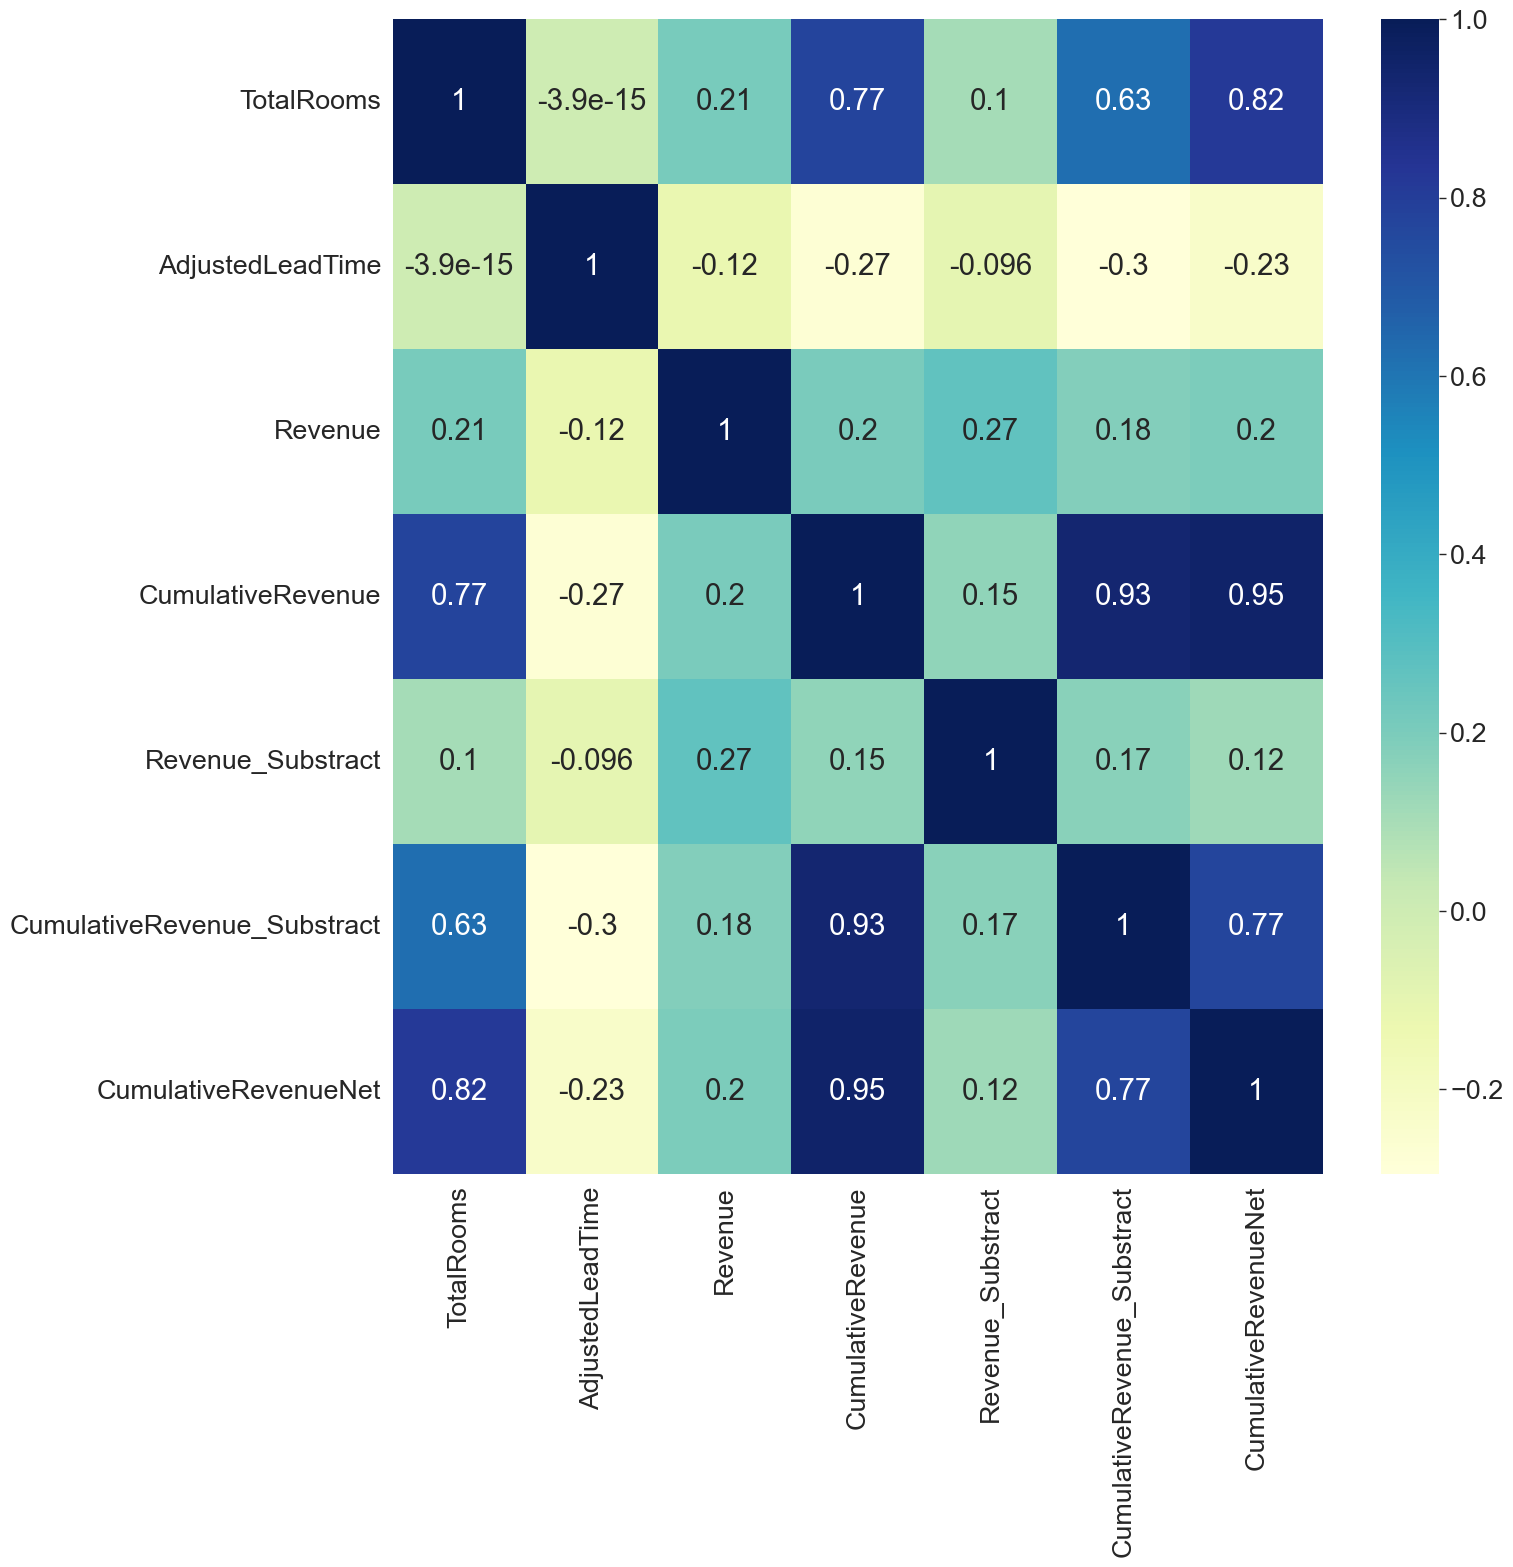

In [11]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_context('paper', font_scale = 2.2)
sns.heatmap(dataset[pairplot_columns2].corr(), cmap="YlGnBu", annot=True)

In [12]:
dataset['AdjustedLeadTime_CumulativeRevenue'] = dataset['AdjustedLeadTime']*dataset['CumulativeRevenue']
dataset['AdjustedLeadTime_CumulativeRevenue_Substract'] = dataset['AdjustedLeadTime']*dataset['CumulativeRevenue_Substract']
dataset['AdjustedLeadTime_CumulativeRevenueNet'] = dataset['AdjustedLeadTime']*dataset['CumulativeRevenueNet']
pairplot_columns2_1=['TotalRooms','AdjustedLeadTime_CumulativeRevenue','AdjustedLeadTime_CumulativeRevenue_Substract','AdjustedLeadTime_CumulativeRevenueNet']

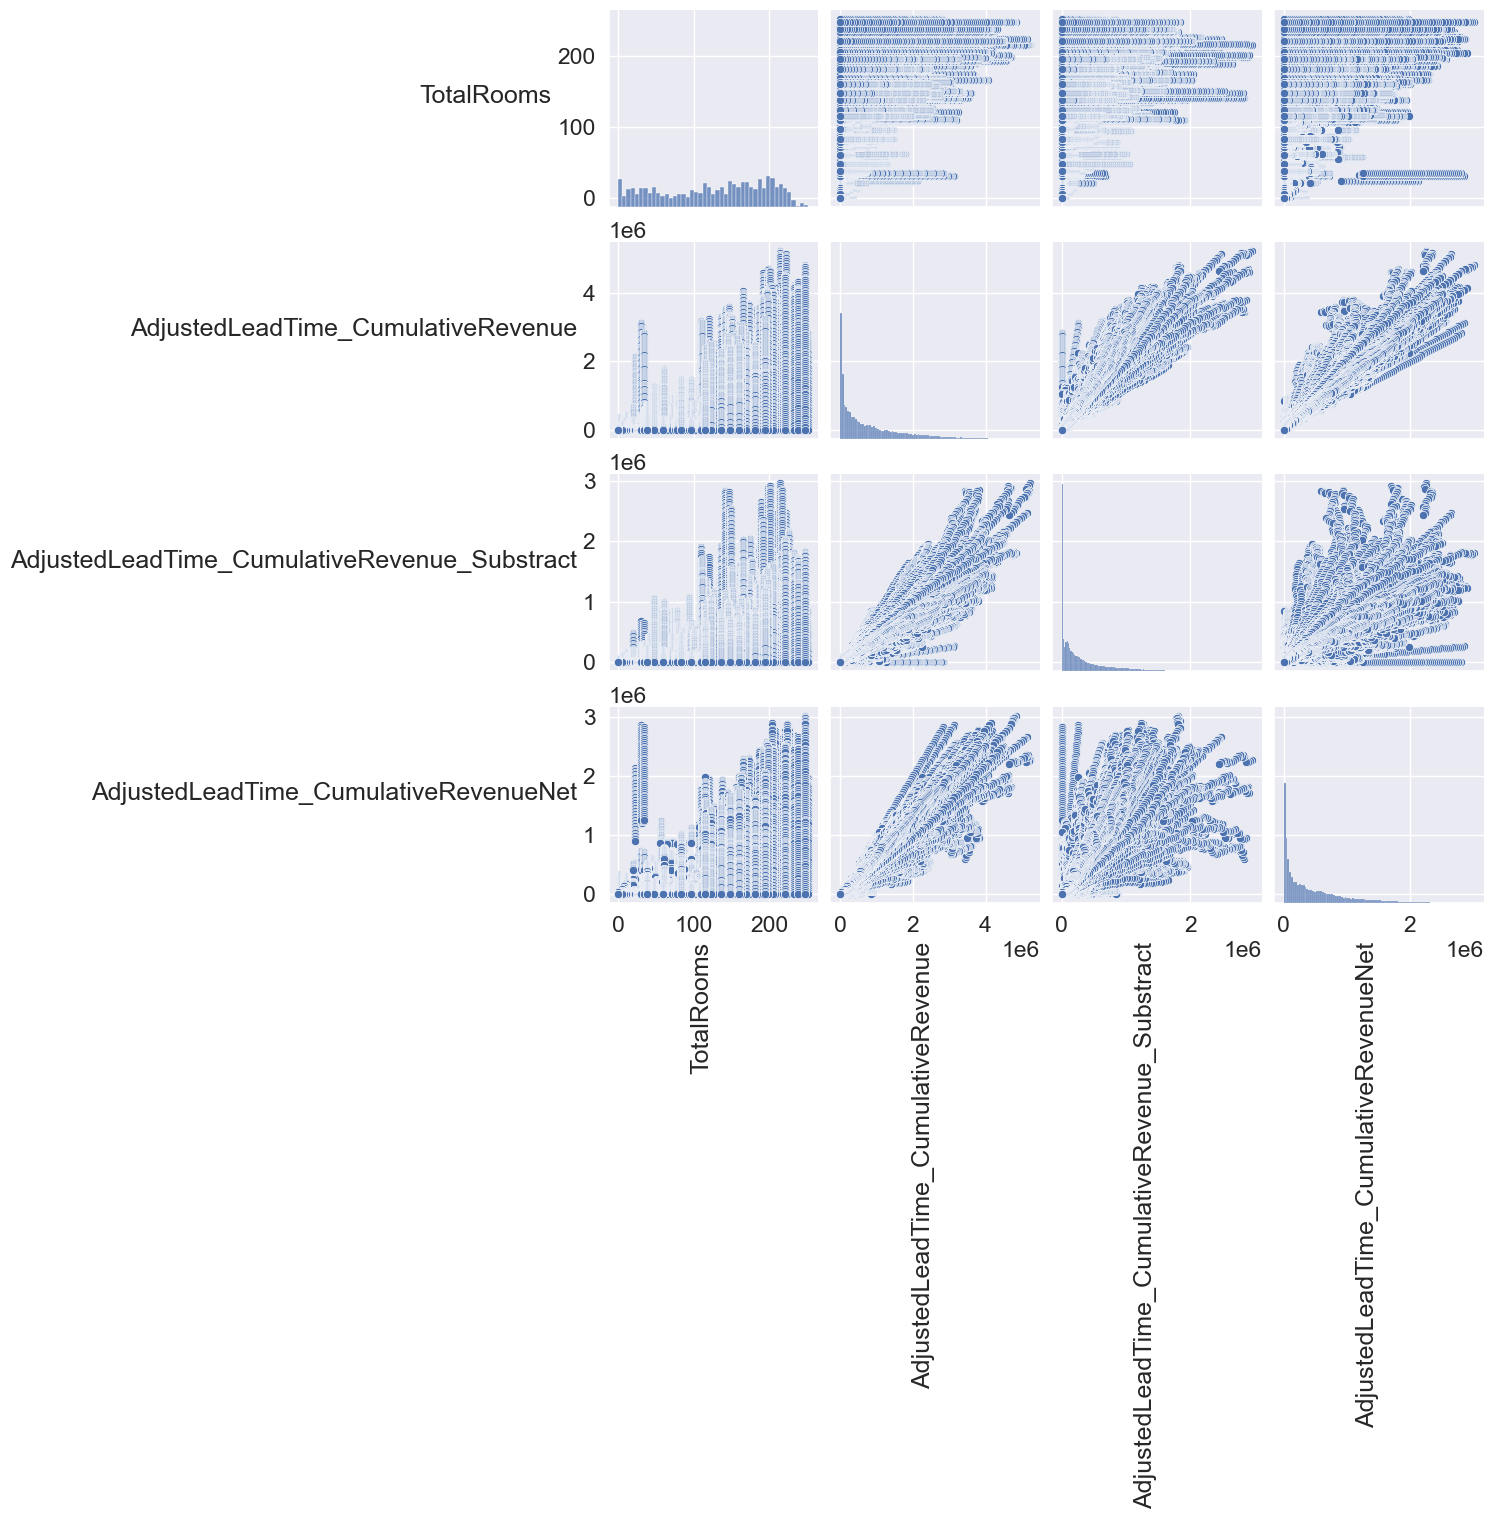

In [13]:
### Pairplot with interaction effect features
sns.set(font_scale=1.5)
grid = sns.pairplot(dataset[pairplot_columns2_1])
for axes in grid.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=90, horizontalalignment='right')

plt.show()


<AxesSubplot: >

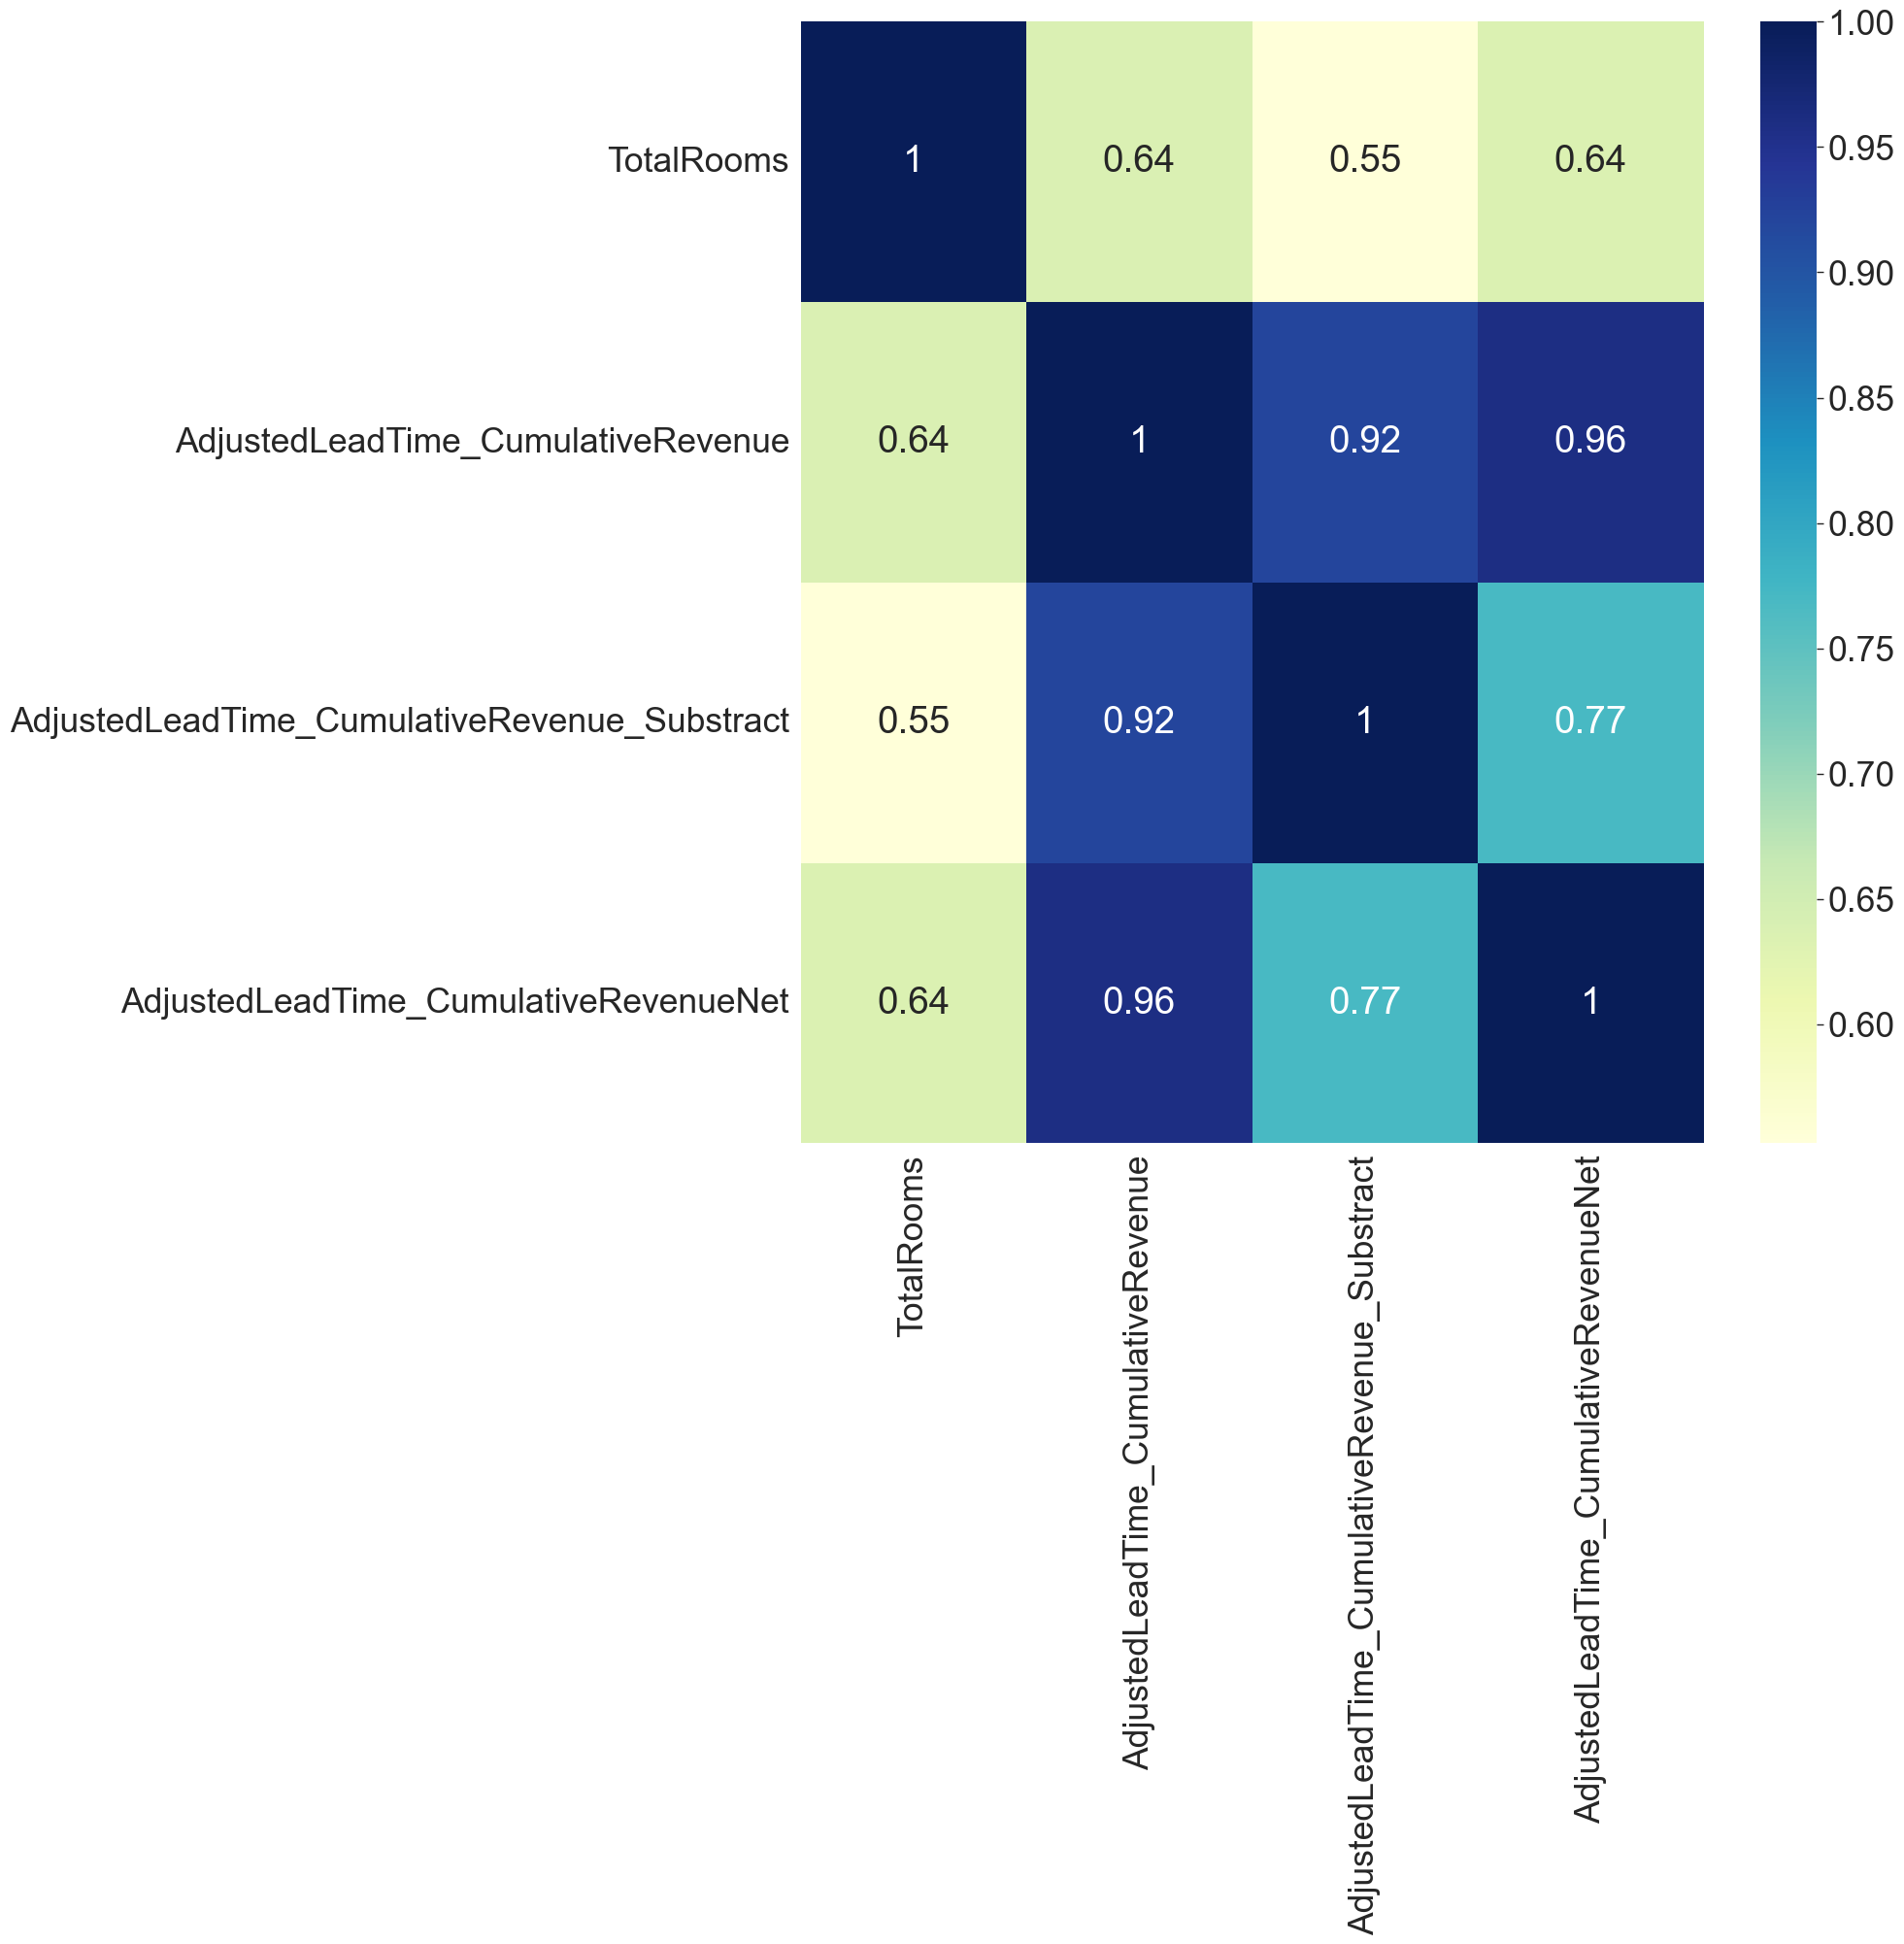

In [14]:
#correlation_columns=['TotalRooms','AdjustedLeadTime', 'NumberOfRooms','CumulativeNumberOfRooms', 'NumberOfRooms_Substract','CumulativeNumberOfRooms_Substract', 'CumulativeNumberOfRoomsNet', 'ADR', 'CumulativeADR', 'ADR_Substract','CumulativeADR_Substract', 'CumulativeADRNet', 'TotalADR']
sns.set(rc={'figure.figsize':(15,15)})
sns.set_context('paper', font_scale = 2.9)
sns.heatmap(dataset[pairplot_columns2_1].corr(), cmap="YlGnBu", annot=True)

## Categorical Features

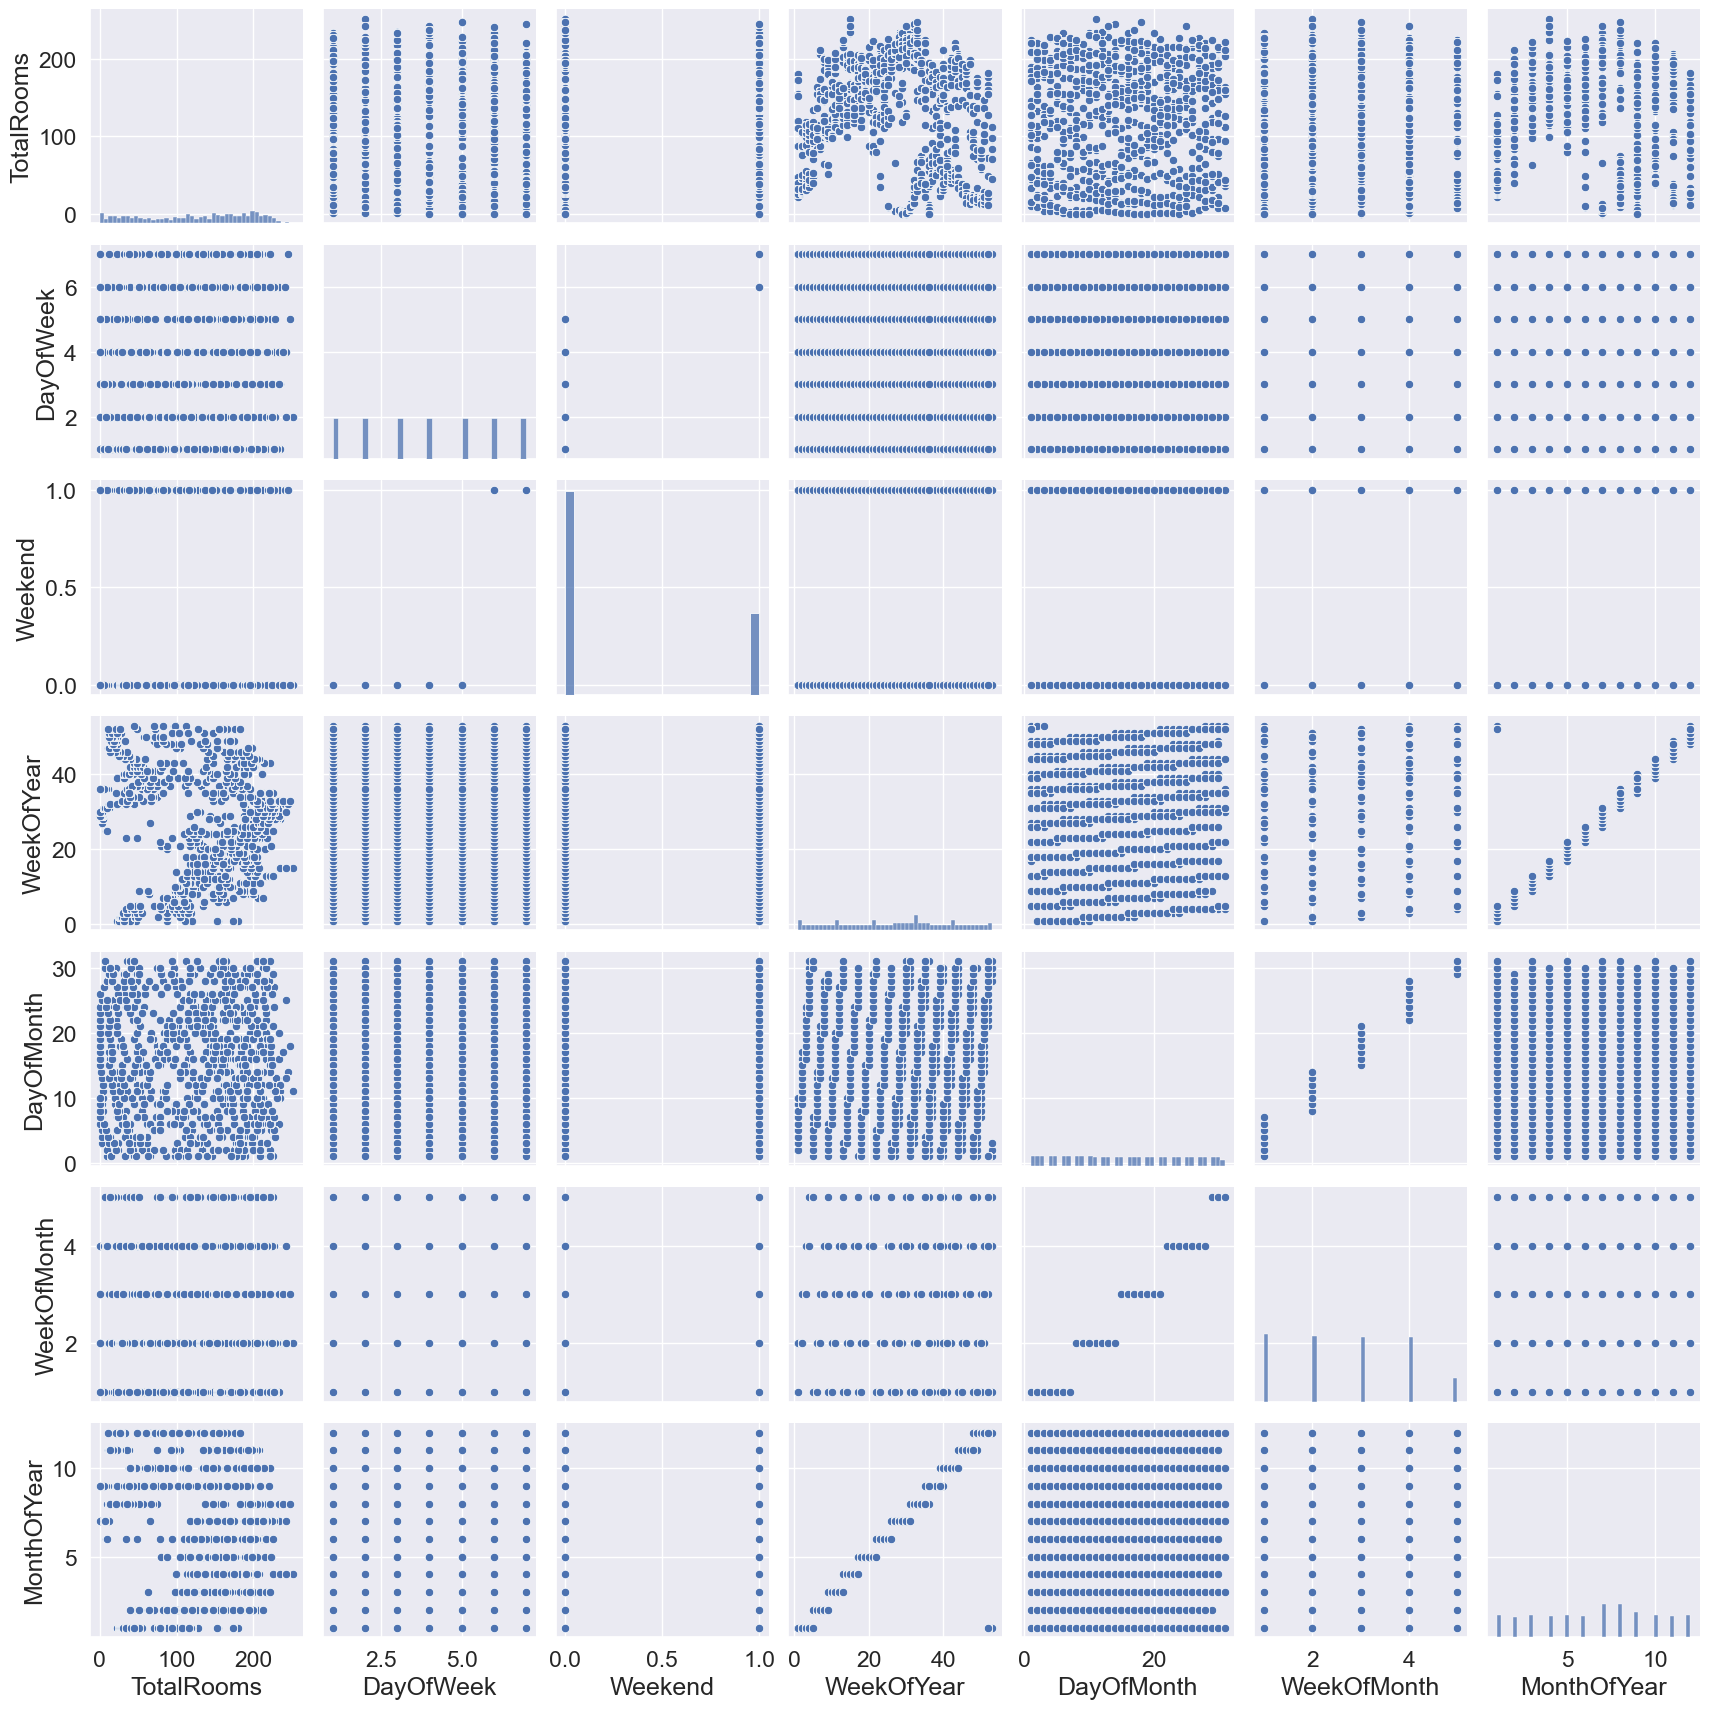

In [15]:
#Pairplot with seasonality
pairplot_columns3=['TotalRooms', 'DayOfWeek','Weekend','WeekOfYear', 'DayOfMonth', 'WeekOfMonth', 'MonthOfYear']
sns.set(font_scale=1.5)
sns.pairplot(dataset[pairplot_columns3])
# plt.title('Pairplot of Total rooms reservation with booking seasonality')
plt.show()

Wednesday    14.32
Thursday     14.32
Friday       14.32
Saturday     14.32
Sunday       14.32
Monday       14.20
Tuesday      14.20
Name: DayOfWeek, dtype: float64


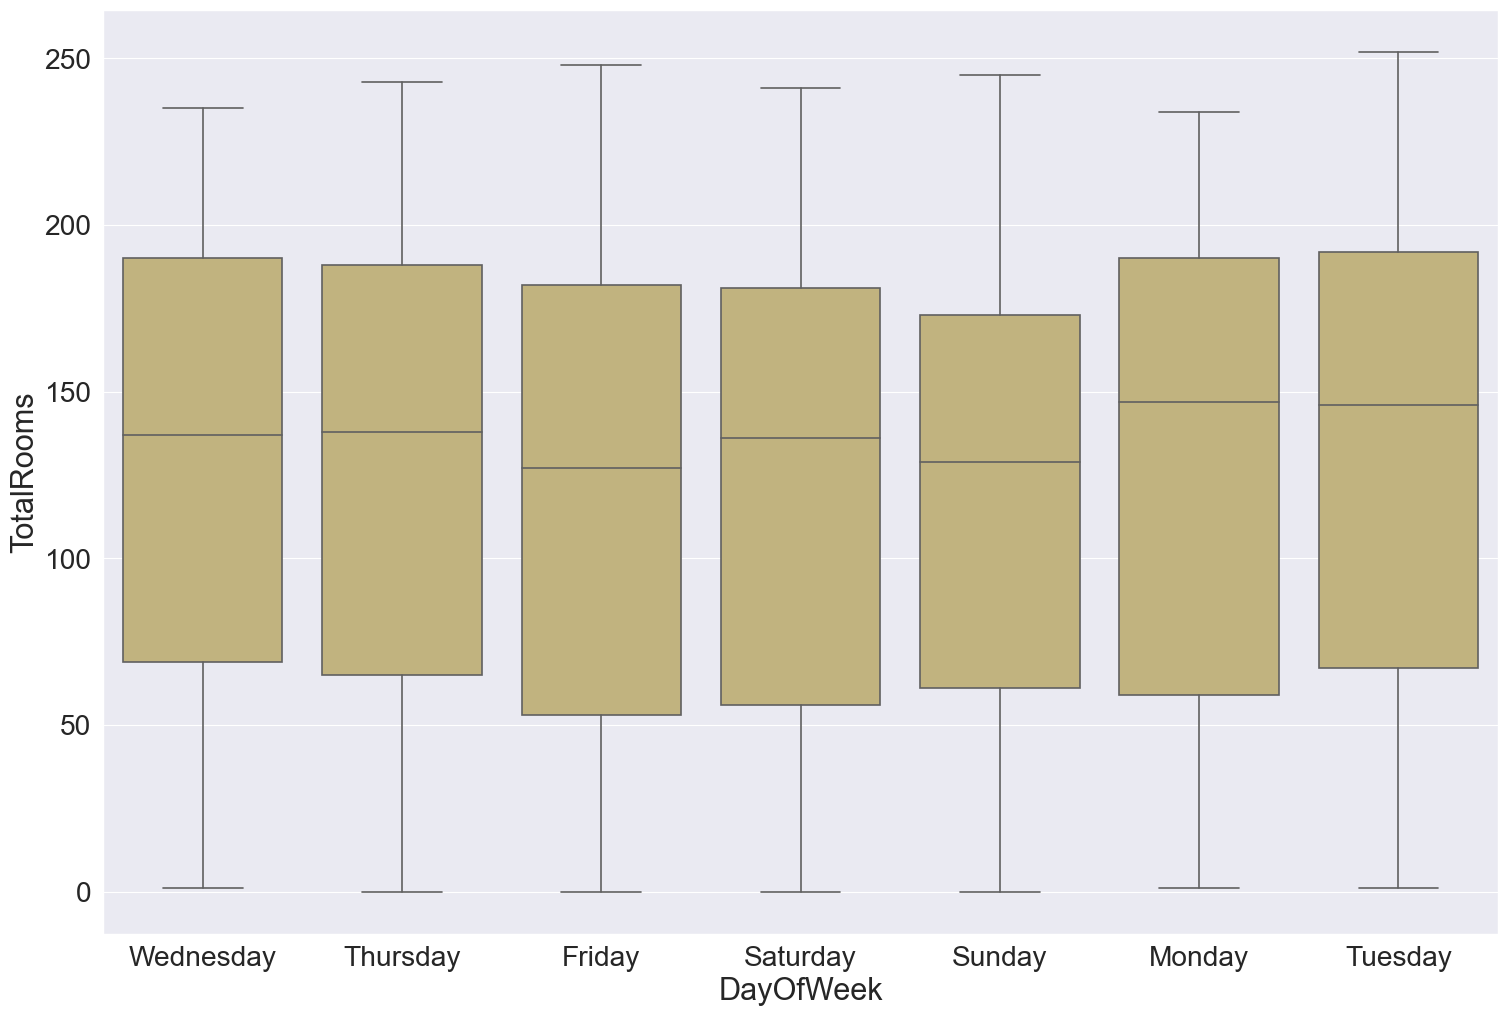

In [16]:
color = 'y'

daymap = {1:'Monday',2:'Tuesday',3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dataset['DayOfWeek'] = dataset['DayOfWeek'].map(daymap)
dataset

pal = {'Monday':color,'Tuesday':color,'Wednesday':color, 'Thursday':color, 'Friday':color, 'Saturday':color, 'Sunday':color}

sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2.3)
sns.boxplot(x = 'DayOfWeek', y = 'TotalRooms', data = dataset,palette=pal)
#sns.despine()
print(np.round(dataset['DayOfWeek'].value_counts(normalize=True)*100,2))
daymap = {'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
dataset['DayOfWeek'] = dataset['DayOfWeek'].map(daymap)

Weekday    71.36
Weekend    28.64
Name: Weekend, dtype: float64


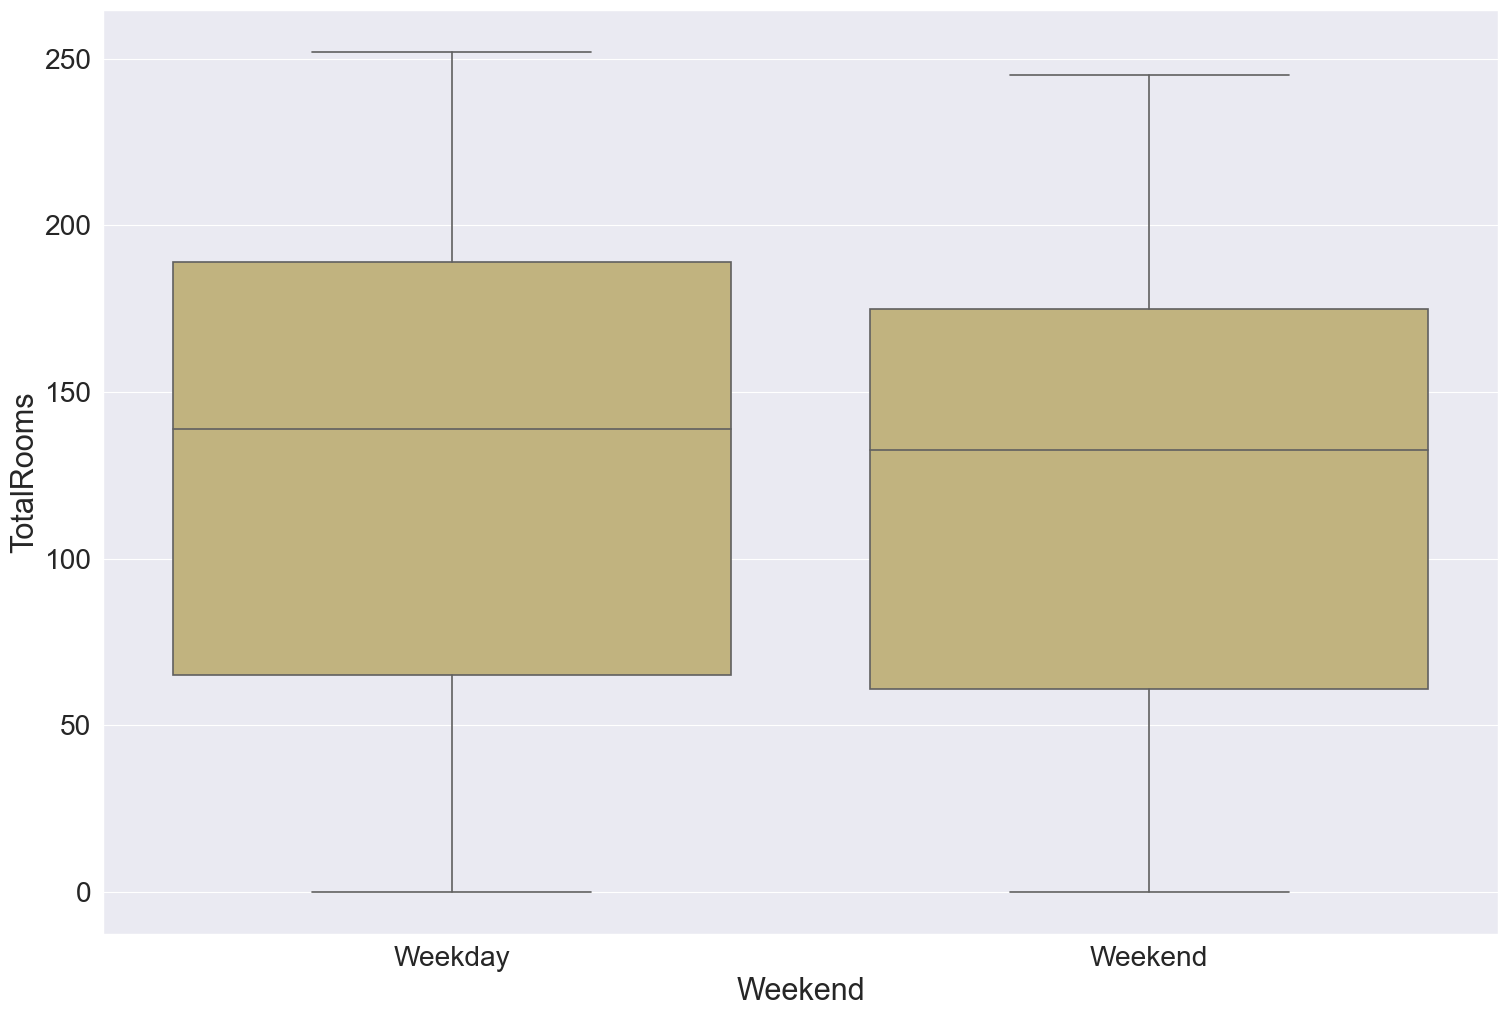

In [17]:
color = 'y'

daymap = {1:'Weekend',0:'Weekday'}
dataset['Weekend'] = dataset['Weekend'].map(daymap)
dataset

pal = {'Weekend':color,'Weekday':color}

sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2.3)
sns.boxplot(x = 'Weekend', y = 'TotalRooms', data = dataset,palette=pal)
#sns.despine()
print(np.round(dataset['Weekend'].value_counts(normalize=True)*100,2))
daymap = {'Weekend':1,'Weekday':0}
dataset['DayOfWeek'] = dataset['DayOfWeek'].map(daymap)

36    2.62
28    2.62
29    2.62
30    2.62
31    2.62
32    2.62
33    2.62
34    2.62
35    2.62
27    2.37
7     1.74
8     1.74
9     1.74
15    1.74
10    1.74
11    1.74
12    1.74
13    1.74
14    1.74
20    1.74
16    1.74
17    1.74
18    1.74
19    1.74
5     1.74
21    1.74
22    1.74
23    1.74
24    1.74
25    1.74
6     1.74
26    1.74
4     1.74
45    1.74
37    1.74
38    1.74
39    1.74
40    1.74
41    1.74
42    1.74
43    1.74
44    1.74
46    1.74
3     1.74
47    1.74
48    1.74
49    1.74
50    1.74
51    1.74
52    1.74
1     1.74
2     1.74
53    0.87
Name: WeekOfYear, dtype: float64

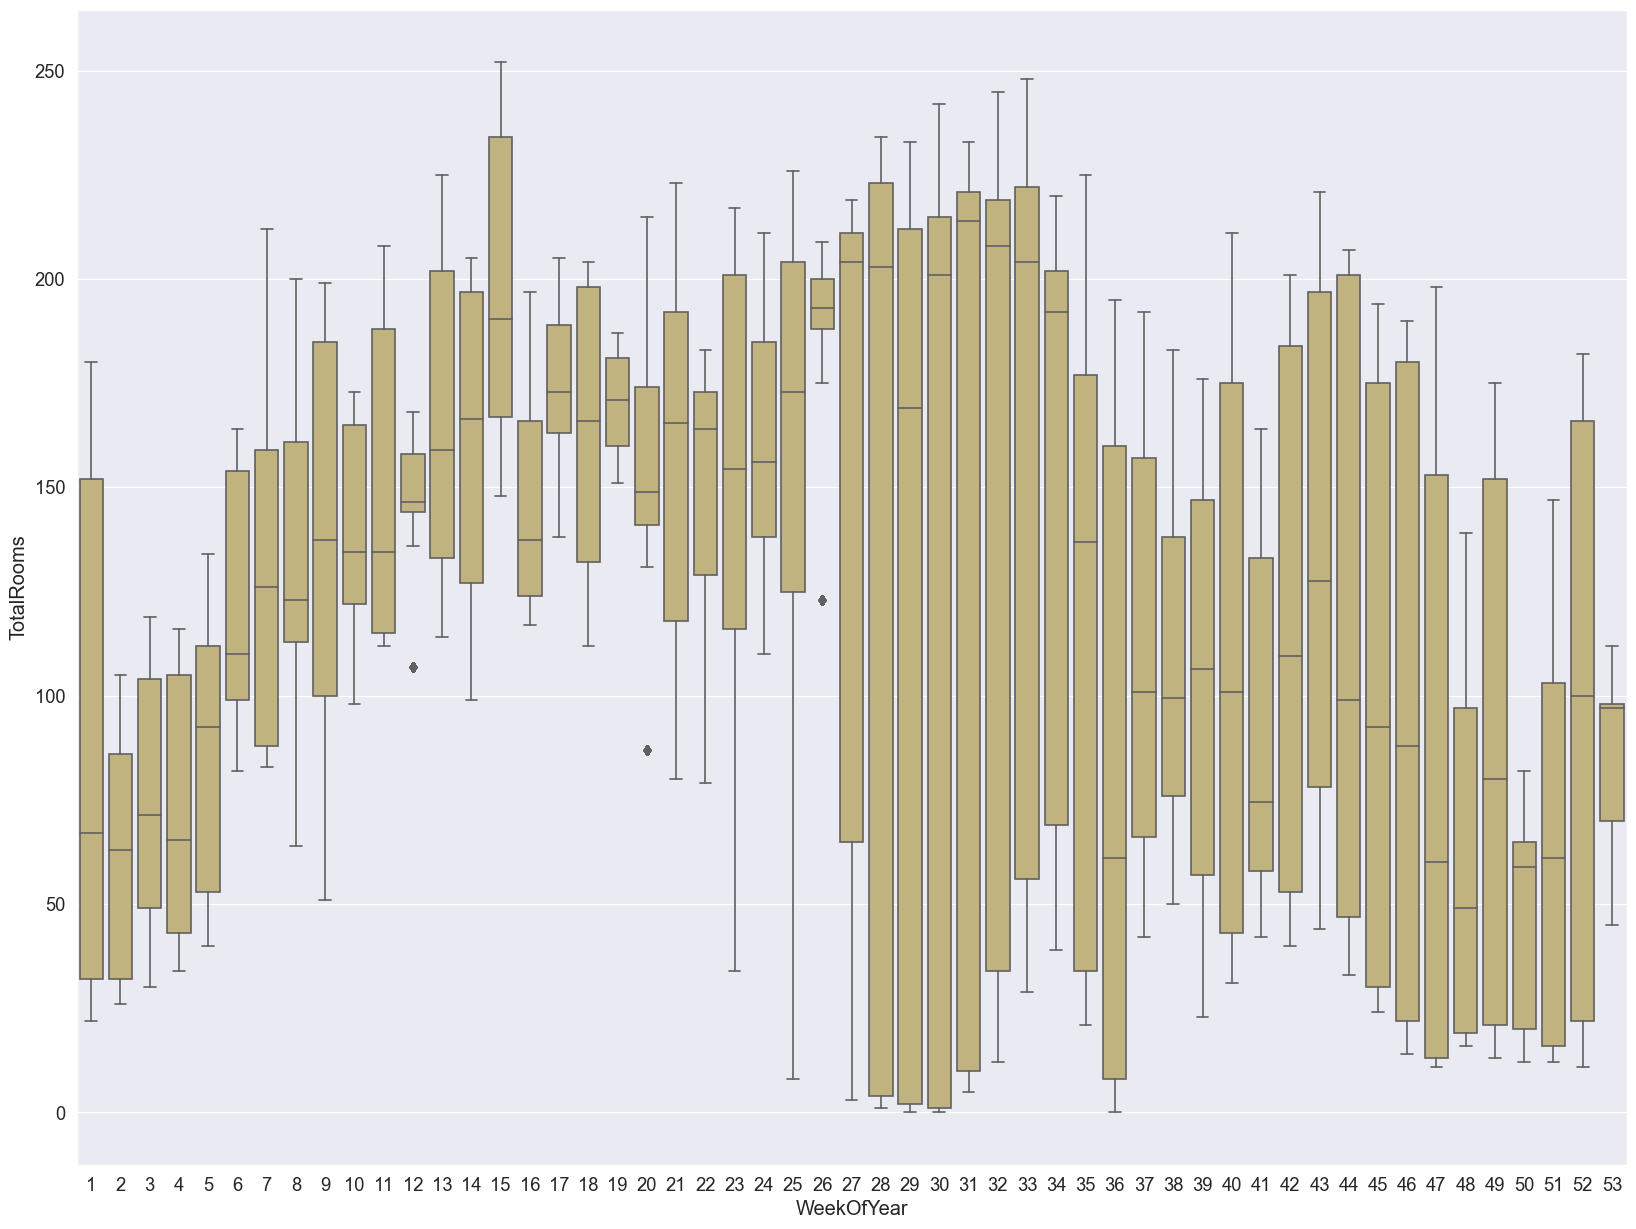

In [18]:
color = 'y'
pal = {27:color,28:color,29:color,30:color,31:color,32:color,33:color,34:color,35:color,36:color,37:color,38:color,39:color,40:color,41:color,42:color,43:color,
       44:color,45:color,46:color,47:color,48:color,49:color,50:color,51:color,52:color,53:color, 1:color, 2:color, 3:color, 4:color, 5:color, 6:color, 7:color,
        8:color, 9:color,10:color,11:color,12:color,13:color,14:color,15:color,16:color,17:color,18:color,19:color,20:color,21:color,22:color,23:color,24:color,
       25:color,26:color}

sns.set(rc={'figure.figsize':(20,15)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.boxplot(x = 'WeekOfYear', y = 'TotalRooms', data = dataset,palette=pal)
np.round(dataset['WeekOfYear'].value_counts(normalize=True)*100,2)

7     11.58
8     11.58
9      8.72
10     7.72
12     7.72
1      7.72
3      7.72
5      7.72
11     7.47
4      7.47
6      7.47
2      7.10
Name: MonthOfYear, dtype: float64

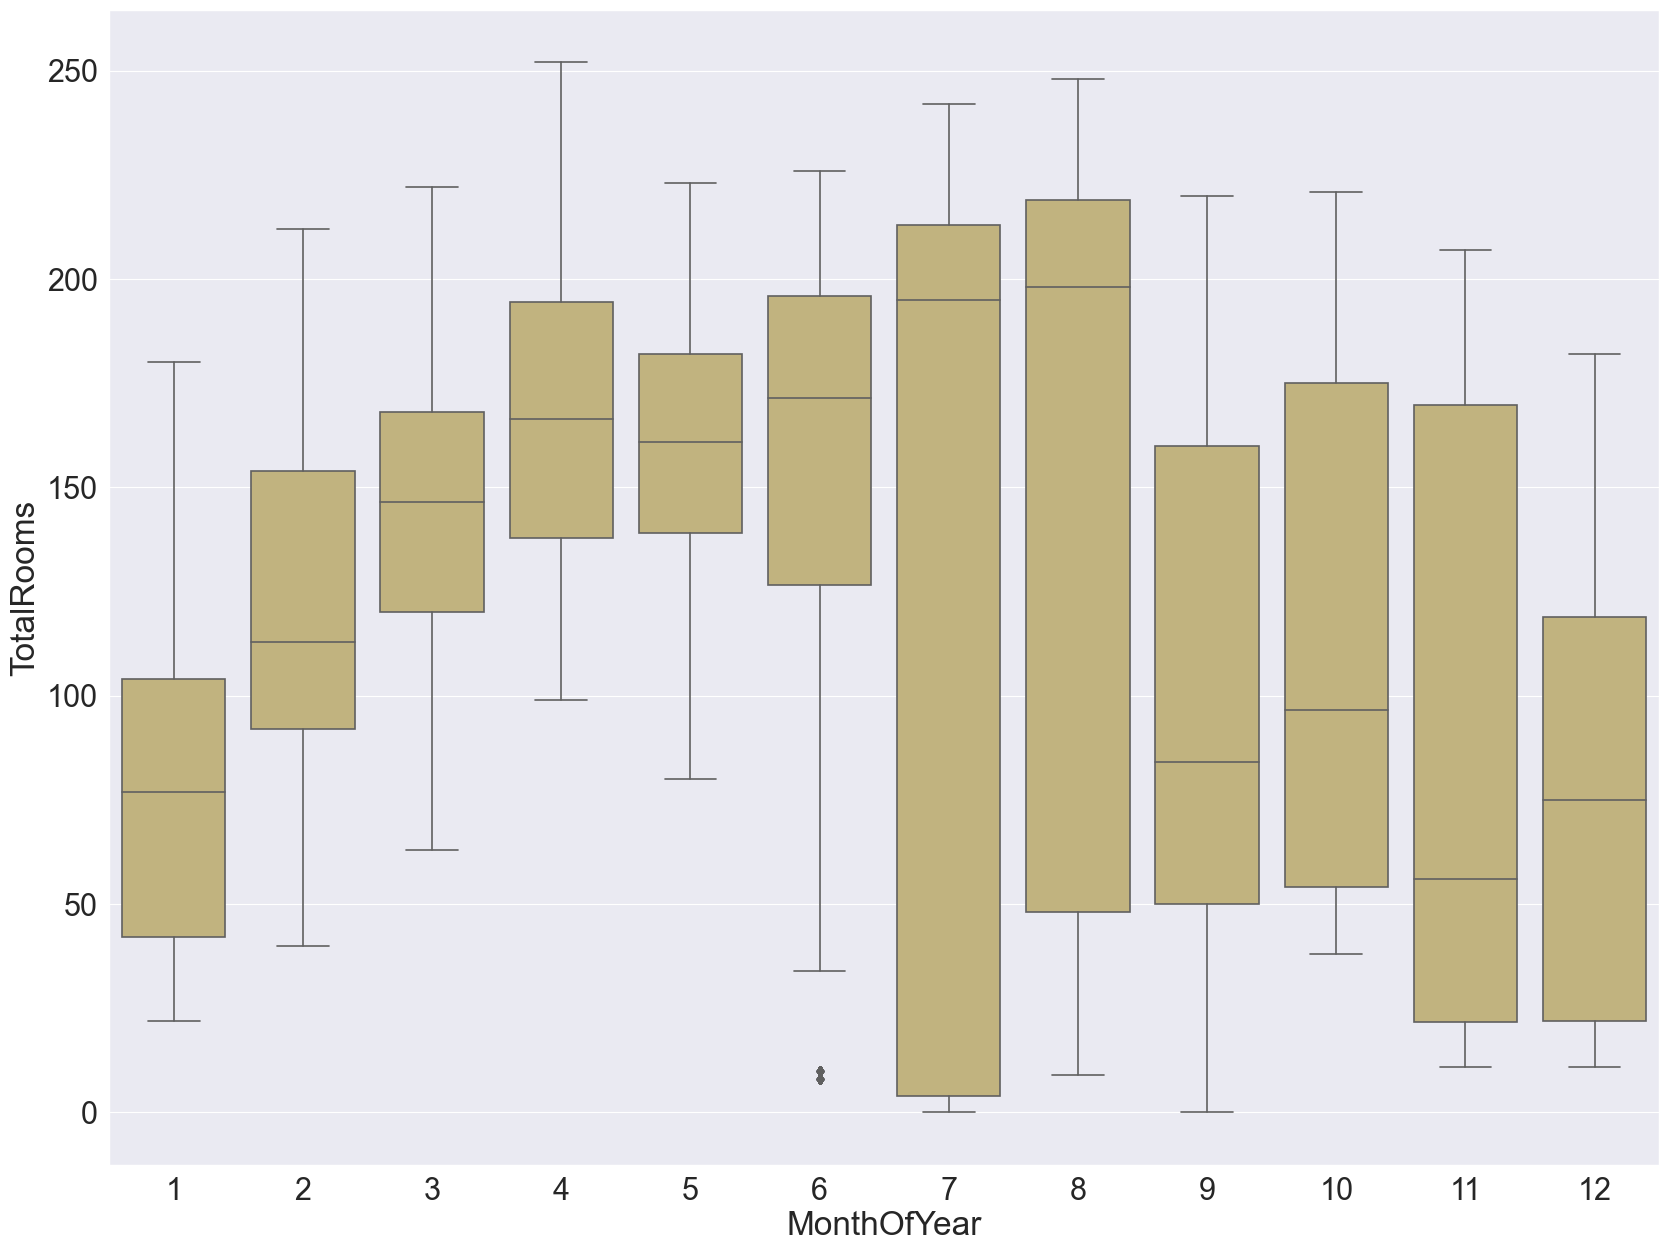

In [19]:
color = 'y'
pal ={1:color, 2:color, 3:color, 4:color, 5:color, 6:color, 7:color, 8:color, 9:color,10:color,11:color,12:color}

sns.set(rc={'figure.figsize':(20,15)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2.5)
sns.boxplot(x = 'MonthOfYear', y = 'TotalRooms', data = dataset,palette=pal)
np.round(dataset['MonthOfYear'].value_counts(normalize=True)*100,2)

<AxesSubplot: xlabel='MonthOfYear'>

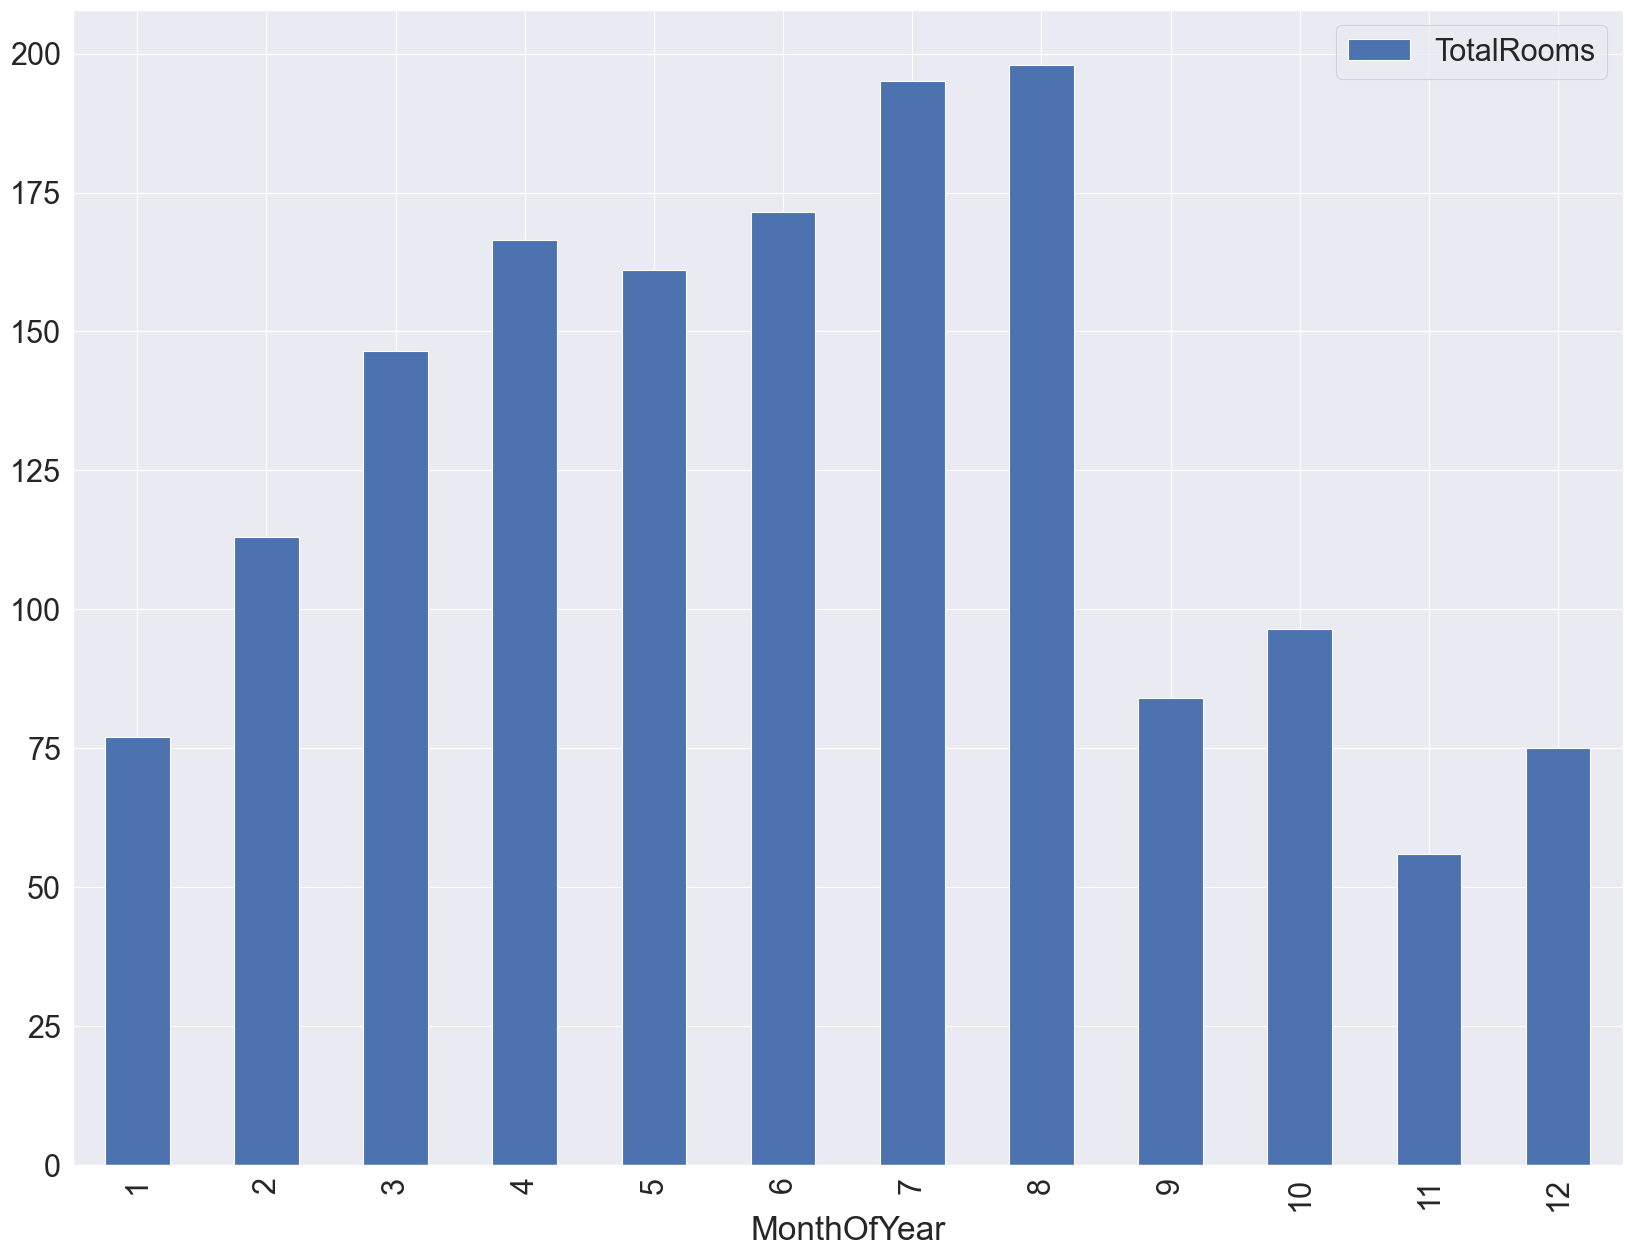

In [20]:
dataset[['MonthOfYear', 'TotalRooms']].groupby('MonthOfYear').median().plot.bar()

1     3.36
7     3.36
2     3.36
9     3.36
8     3.36
10    3.36
6     3.36
5     3.36
4     3.36
3     3.36
20    3.24
28    3.24
27    3.24
26    3.24
25    3.24
24    3.24
23    3.24
22    3.24
21    3.24
16    3.24
19    3.24
18    3.24
17    3.24
15    3.24
14    3.24
13    3.24
12    3.24
11    3.24
29    3.11
30    2.99
31    1.99
Name: DayOfMonth, dtype: float64

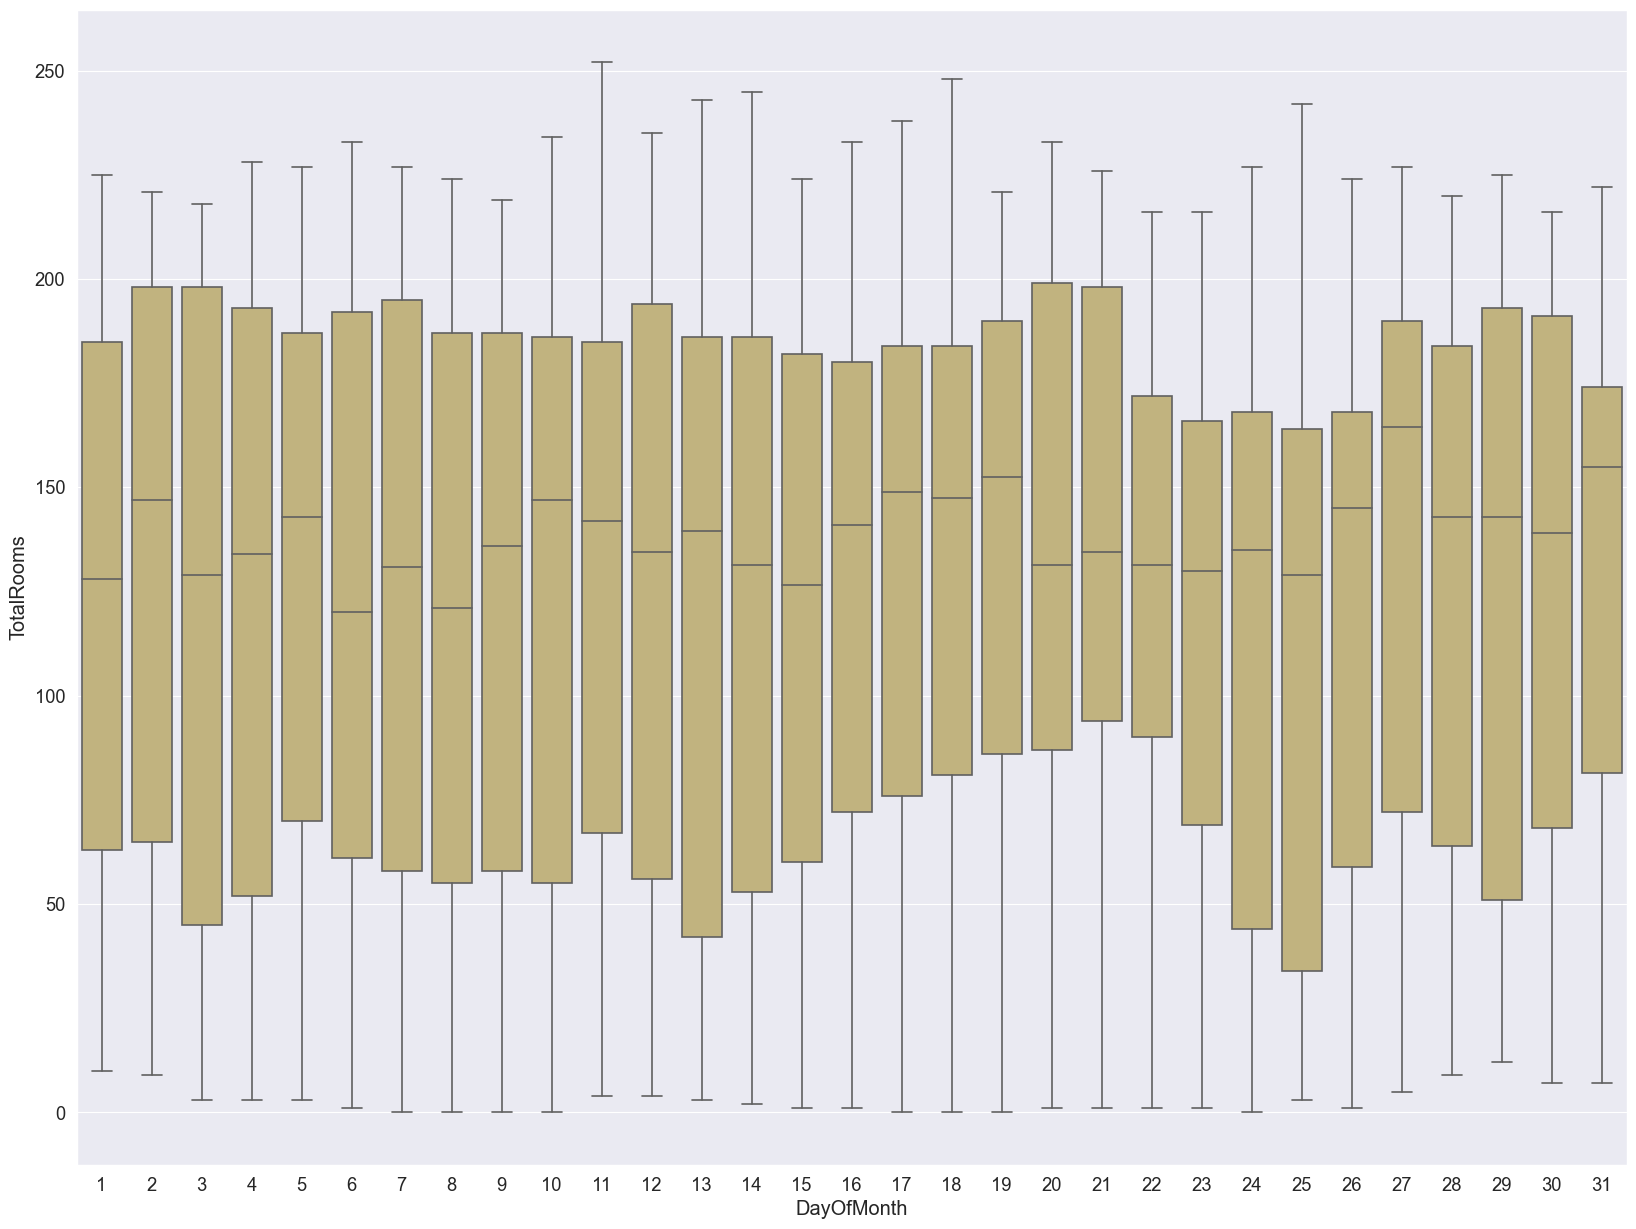

In [21]:
color = 'y'
pal = {1:color, 2:color, 3:color, 4:color, 5:color, 6:color, 7:color, 8:color, 9:color,10:color,11:color,12:color,13:color,14:color,15:color,16:color,17:color,18:color,19:color,20:color,21:color,22:color,23:color,24:color,
       25:color,26:color,27:color,28:color,29:color,30:color,31:color}

sns.set(rc={'figure.figsize':(20,15)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 1.5)
sns.boxplot(x = 'DayOfMonth', y = 'TotalRooms', data = dataset,palette=pal)
np.round(dataset['DayOfMonth'].value_counts(normalize=True)*100,2)

1    23.54
2    23.04
3    22.67
4    22.67
5     8.09
Name: WeekOfMonth, dtype: float64

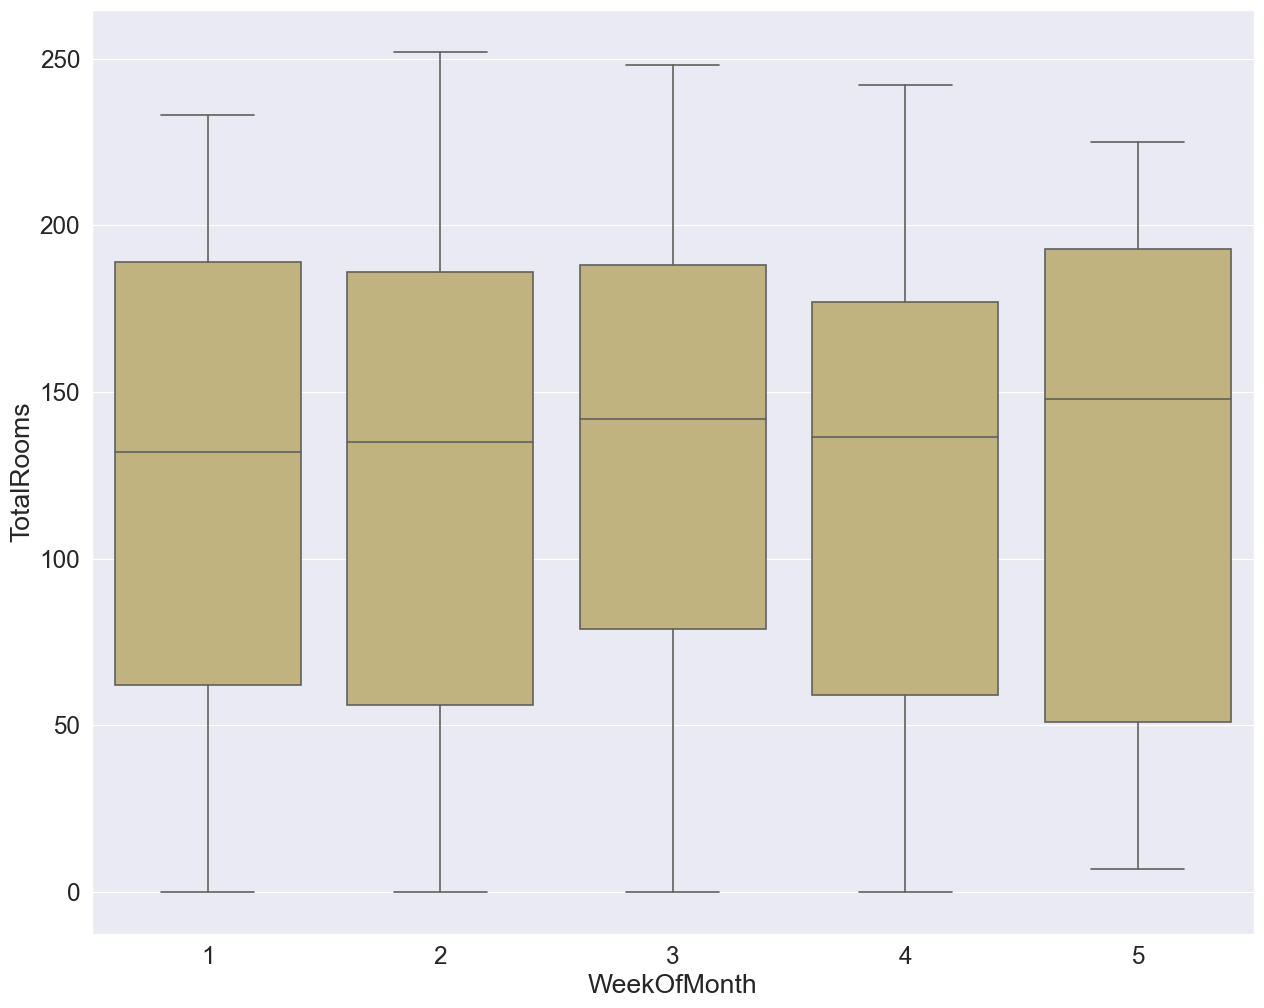

In [22]:
color = 'y'
pal = {1:color, 2:color, 3:color, 4:color, 5:color}

sns.set(rc={'figure.figsize':(15,12)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2)
sns.boxplot(x = 'WeekOfMonth', y = 'TotalRooms', data = dataset,palette=pal)
np.round(dataset['WeekOfMonth'].value_counts(normalize=True)*100,2)

In [23]:
dataset['MonthOfYearPeakDemand'] = np.where(dataset['MonthOfYear'].isin([7,8]),1,0)

samples=[]
for condition in dataset.groupby('MonthOfYearPeakDemand')['TotalRooms']:
    samples.append(condition[1].values)
f_val, p_val = f_oneway(*samples)

if p_val<=0.05:
    print('Null hypothesis rejected, there is difference between these groups')

Null hypothesis rejected, there is difference between these groups
